### Libraries


##### INSTALL

In [1]:
pip install topologicpy --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


##### IMPORT

In [6]:
import topologicpy
import json
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import itertools
import math

from IPython.display import clear_output, display



In [7]:
from topologicpy.Topology import Topology
from topologicpy.Cell import Cell
from topologicpy.Graph import Graph
from topologicpy.Vertex import Vertex
from topologicpy.Edge import Edge
from topologicpy.Dictionary import Dictionary
from topologicpy.Cluster import Cluster
from topologicpy.CellComplex import CellComplex


/Users/georgiosgrigoriadis/GitHub/polykatoikia_topology/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Functions

In [8]:
def is_valid_matching(edges_subset):
    nodes_covered = set()
    for u, v in edges_subset:
        if u in nodes_covered or v in nodes_covered:
            return False
        nodes_covered.add(u)
        nodes_covered.add(v)
    return True

def select_edge(graph_edges, edge_nodes):
    "Select an edge from the graph based on the index"
    graph_edges = list(graph_edges)
    
    for i, edge in enumerate(graph_edges):
        test_edge_index = edge[:2]
        if test_edge_index == edge_nodes:
            return i, edge

def find_node(graph, node_index):
    '''Return the node from a graph from its index'''
    return graph.nodes(data=True)[node_index]
    
def random_color(normalize = False):
    "Return a random color"
    
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    
    if normalize == True:
        rand_color = (r/255,b/255,b/255)
    else:
        rand_color = (r,g,b)
    
    return rand_color

def convert_edges_to_df(edges):
    '''Return a dataframe of edges'''
    
    edges_data = []
    for u, v, data in edges:
        edge_info = {
            "node1" : u,
            "node2" : v,
            **data
        }
        edges_data.append(edge_info)
    return pd.DataFrame(edges_data)

def create_graph_from_json(graph_json, vertices_python_dictionary = None):
    '''Creates a Topologic Graph'''
    
    ##############
    ## VERTICES ##
    ##############
    
    # Export Vertices with dictionaries
    vertices = graph_json["vertices"]

    verticesKeys= list(vertices.keys())

    # Create topologic_core.Vertex
    graph_vertices=[]

    # Vertex coord
    for i,v in enumerate(verticesKeys):
        X = vertices[v]["x"]
        Y = vertices[v]["y"]
        Z = vertices[v]["z"]
        
        # topologic_core.Vertex
        vertex = Vertex.ByCoordinates(x = X, y = Y, z = Z)
        
        # Create dictionary
        if vertices_python_dictionary is not None:
            keys = list(vertices_python_dictionary[list(vertices_python_dictionary)[0]].keys())
            values = list(vertices_python_dictionary[list(vertices_python_dictionary)[i]].values())
            
            # Create vertices dictionaries
            vertex_dictionary = Dictionary.ByKeysValues(keys = keys, values = values)
            
            # Set the dictionary to the created topologic_core.Vertex
            set_vertex_dict = Topology.SetDictionary(vertex, vertex_dictionary)
            
            # Add new vertex with dictionary to the new list of vertices
            graph_vertices.append(set_vertex_dict)
            
            # Add the topologic_core.Vertex created to the graph_json dictionary in order to use it for the creation of the edges
            vertices[v]["topologic_Vertex"] = set_vertex_dict
        else:
            vertices[v]["topologic_Vertex"] =  vertex
 
    ##############
    ## VERTICES ##
    ##############
    
    ###############
    #### EDGES ####
    ###############
    
    # Export Edges with dictionaries
    edges = graph_json["edges"]
    edgesKeys = list(edges.keys())

    # Create topologic_core.Edge
    graph_edges = []

    for e in edgesKeys:
        start = vertices[edges[e]["source"]]["topologic_Vertex"] # Find the topologic_core.Vertex at key ex. "Vertex 0001"
        end = vertices[edges[e]["target"]]["topologic_Vertex"]
        
        # topologic_core.Edge
        edge = Edge.ByVertices([start,end])
        
        # Add new edge to the new list of edges
        graph_edges.append(edge)
        
    topologic_Graph = Graph.ByVerticesEdges(graph_vertices, graph_edges)
    
    ###############
    #### EDGES ####
    ###############
    
    return topologic_Graph

### Import JSON graph

In [9]:
# Import the space graph json
with open("/Users/georgiosgrigoriadis/GitHub/polykatoikia_topology/data/spaceGraphF1.2.json") as json_data:
    spaceGraph_json = json.load(json_data)

In [10]:
spaceGraph_json

{'vertices': {'Vertex_0000': {'apartment': 0,
   'type': 'Space Cells',
   'x': 14.871457,
   'y': 9.839343,
   'z': 10.0},
  'Vertex_0001': {'apartment': 1,
   'type': 'Space Cells',
   'x': 7.081439,
   'y': 1.965,
   'z': 10.0},
  'Vertex_0002': {'apartment': 'none',
   'type': 'Staircase',
   'x': 11.434655,
   'y': 5.832027,
   'z': 10.0},
  'Vertex_0003': {'apartment': 0,
   'type': 'Space Cells',
   'x': 2.633595,
   'y': 9.835,
   'z': 10.0},
  'Vertex_0004': {'apartment': 0,
   'type': 'Space Cells',
   'x': 12.452524,
   'y': 9.746953,
   'z': 10.0},
  'Vertex_0005': {'apartment': 0,
   'type': 'Akalyptos',
   'x': 12.452521,
   'y': 11.307788,
   'z': 10.0},
  'Vertex_0006': {'apartment': 0,
   'type': 'Corridor',
   'x': 11.434664,
   'y': 8.243339,
   'z': 10.0},
  'Vertex_0007': {'apartment': 0,
   'type': 'Space Cells',
   'x': 7.081439,
   'y': 6.900683,
   'z': 10.0},
  'Vertex_0008': {'apartment': 0,
   'type': 'Space Cells',
   'x': 14.881099,
   'y': 6.900683,
   'z

### Prepare data for NetworkX Graph Manipulation

**Nodes**

For the nodes we will use only the attributes needed for the graphs manipulations. 
We will take the vertex key and we will create an **"index"** attribute in order for us to be able to retrieve the correct **topologic_core.Vertex** in the next steps.

In [11]:
# Data for nodes
create_dictionary_nodes = {}
vertices_dict = spaceGraph_json["vertices"] # Nodes from Graph

# Create dictionary to add to function
for key, value in vertices_dict.items():
    create_dictionary_nodes[key] = {"x":value["x"],
                                    "y":value["y"],
                                    "z":value["z"],
                                    "type":value["type"],
                                    "apartment":value["apartment"]
                                    }

# Get a list of the keys Python Dictionary
keys = list(create_dictionary_nodes[list(create_dictionary_nodes)[0]].keys())

# Get a list of the values Python Dictionary
values = []
for i,key in enumerate(list(create_dictionary_nodes.keys())):
    value = list(create_dictionary_nodes[list(create_dictionary_nodes)[i]].values())
    values.append(value)

In [12]:
# Visualize dictionary
df_nodes_dict = pd.DataFrame(dict(create_dictionary_nodes)).transpose()
df_nodes_dict

x          y     z         type apartment
Vertex_0000  14.871457   9.839343  10.0  Space Cells         0
Vertex_0001   7.081439      1.965  10.0  Space Cells         1
Vertex_0002  11.434655   5.832027  10.0    Staircase      none
Vertex_0003   2.633595      9.835  10.0  Space Cells         0
Vertex_0004  12.452524   9.746953  10.0  Space Cells         0
Vertex_0005  12.452521  11.307788  10.0    Akalyptos         0
Vertex_0006  11.434664   8.243339  10.0     Corridor         0
Vertex_0007   7.081439   6.900683  10.0  Space Cells         0
Vertex_0008  14.881099   6.900683  10.0  Space Cells         0
Vertex_0009    9.92572  10.249178  10.0  Space Cells         0
Vertex_0010   7.081441      9.835  10.0  Space Cells         0
Vertex_0011  17.634283      9.835  10.0  Space Cells         0
Vertex_0012  17.634283   6.900683  10.0  Space Cells         0
Vertex_0013   2.633594      1.965  10.0  Space Cells         1
Vertex_0014  17.634283   4.900683  10.0  Space Cells         1
Vertex_0015   2.633595   6.900683  10.0  Space Cells         0
Vertex_0016  17.634283      1.965  10.0  Space Cells         1
Vertex_0017  12.452345        0.5  10.0    Akalyptos         1
Vertex_0018   2.633595   4.900683  10.0  Space Cells         1
Vertex_0019  12.452433   1.987838  10.0  Space Cells         1
Vertex_0020  14.881099   4.900683  10.0  Space Cells         1
Vertex_0021   9.925599   1.487905  10.0  Space Cells         1
Vertex_0022  14.871856   1.960205  10.0  Space Cells         1
Vertex_0023   7.081439   4.900683  10.0  Space Cells         1
Vertex_0024   11.43466   3.420715  10.0     Corridor         1

**Edges**



In [13]:
# Data for edges
create_dictionary_edges = {}
edges_dictionary = spaceGraph_json["edges"]


# Create dictionary to add to function
for key, value in edges_dictionary.items(): 
    # Create dictionary
    create_dictionary_edges[key] = {"relationship": value["relationship"],
                                    'source': value['source'],
                                    'target': value['target']}

# Get a list of the keys Python Dictionary
keys = list(create_dictionary_edges[list(create_dictionary_edges)[0]].keys())

# Get a list of the values Python Dictionary
values = []
for i,key in enumerate(list(create_dictionary_edges.keys())):
    value = list(create_dictionary_edges[list(create_dictionary_edges)[i]].values())
    values.append(value)

In [14]:
# Visualize dictionary
df_edge_dict = pd.DataFrame(dict(create_dictionary_edges)).transpose()
df_edge_dict

relationship       source       target
Edge_00       Direct  Vertex_0005  Vertex_0000
Edge_01       Direct  Vertex_0000  Vertex_0006
Edge_02       Direct  Vertex_0004  Vertex_0000
Edge_03       Direct  Vertex_0000  Vertex_0011
Edge_04       Direct  Vertex_0000  Vertex_0008
Edge_05       Direct  Vertex_0001  Vertex_0021
Edge_06       Direct  Vertex_0001  Vertex_0024
Edge_07       Direct  Vertex_0001  Vertex_0013
Edge_08       Direct  Vertex_0002  Vertex_0001
Edge_09       Direct  Vertex_0001  Vertex_0023
Edge_10       Direct  Vertex_0006  Vertex_0002
Edge_11       Direct  Vertex_0002  Vertex_0024
Edge_12       Direct  Vertex_0002  Vertex_0022
Edge_13       Direct  Vertex_0002  Vertex_0007
Edge_14       Direct  Vertex_0002  Vertex_0020
Edge_15       Direct  Vertex_0002  Vertex_0023
Edge_16       Direct  Vertex_0008  Vertex_0002
Edge_17       Direct  Vertex_0010  Vertex_0003
Edge_18       Direct  Vertex_0003  Vertex_0015
Edge_19       Direct  Vertex_0004  Vertex_0005
Edge_20       Direct  Vertex_0004  Vertex_0006
Edge_21       Direct  Vertex_0004  Vertex_0009
Edge_22       Direct  Vertex_0009  Vertex_0005
Edge_23       Direct  Vertex_0006  Vertex_0010
Edge_24       Direct  Vertex_0006  Vertex_0007
Edge_25       Direct  Vertex_0009  Vertex_0006
Edge_26       Direct  Vertex_0006  Vertex_0008
Edge_27       Direct  Vertex_0010  Vertex_0007
Edge_28       Direct  Vertex_0007  Vertex_0015
Edge_29       Direct  Vertex_0008  Vertex_0012
Edge_30       Direct  Vertex_0009  Vertex_0010
Edge_31       Direct  Vertex_0011  Vertex_0012
Edge_32       Direct  Vertex_0013  Vertex_0018
Edge_33       Direct  Vertex_0014  Vertex_0016
Edge_34       Direct  Vertex_0020  Vertex_0014
Edge_35       Direct  Vertex_0022  Vertex_0016
Edge_36       Direct  Vertex_0021  Vertex_0017
Edge_37       Direct  Vertex_0017  Vertex_0019
Edge_38       Direct  Vertex_0022  Vertex_0017
Edge_39       Direct  Vertex_0023  Vertex_0018
Edge_40       Direct  Vertex_0021  Vertex_0019
Edge_41       Direct  Vertex_0024  Vertex_0019
Edge_42       Direct  Vertex_0022  Vertex_0019
Edge_43       Direct  Vertex_0020  Vertex_0022
Edge_44       Direct  Vertex_0024  Vertex_0021
Edge_45       Direct  Vertex_0022  Vertex_0024

### Create Topologic Graph

In [15]:
# Create topologic Graph from JSON
spaceGraph = create_graph_from_json(spaceGraph_json, create_dictionary_nodes)

### Convert it to NetworkX graph

In [16]:
# Convert Topologic Graph to NetworkX graph
nx_Graph = Graph.NetworkXGraph(spaceGraph)

# Get only nodes from NetworkX Graph
nx_nodes = nx_Graph.nodes(data=True)

# Get only edges from NetwokX Graph
nx_edges = nx_Graph.edges(data=True)

##### Create DataFrame for nodes and edges

In [17]:
# Nodes DataFrame
df_nodes = pd.DataFrame(dict(nx_nodes)).transpose()
df_nodes

apartment         type          x          y     z  \
0          0  Space Cells    9.92572  10.249178  10.0   
1          0  Space Cells  14.881099   6.900683  10.0   
2          1  Space Cells  17.634283   4.900683  10.0   
3       none    Staircase  11.434655   5.832027  10.0   
4          1  Space Cells   7.081439      1.965  10.0   
5          0  Space Cells   7.081441      9.835  10.0   
6          0  Space Cells   2.633595      9.835  10.0   
7          0  Space Cells   7.081439   6.900683  10.0   
8          1  Space Cells  12.452433   1.987838  10.0   
9          1  Space Cells  14.871856   1.960205  10.0   
10         1  Space Cells   7.081439   4.900683  10.0   
11         1     Corridor   11.43466   3.420715  10.0   
12         0  Space Cells  14.871457   9.839343  10.0   
13         1  Space Cells   9.925599   1.487905  10.0   
14         1  Space Cells   2.633595   4.900683  10.0   
15         0     Corridor  11.434664   8.243339  10.0   
16         0  Space Cells   2.633595   6.900683  10.0   
17         1  Space Cells  14.881099   4.900683  10.0   
18         1  Space Cells   2.633594      1.965  10.0   
19         0  Space Cells  12.452524   9.746953  10.0   
20         0  Space Cells  17.634283   6.900683  10.0   
21         1  Space Cells  17.634283      1.965  10.0   
22         0  Space Cells  17.634283      9.835  10.0   
23         0    Akalyptos  12.452521  11.307788  10.0   
24         1    Akalyptos  12.452345        0.5  10.0   

                                             pos  
0     [0.43406992899602737, -0.7395479350652516]  
1    [-0.08807507799163625, -0.4028436958279719]  
2      [-0.7657918481076339, 0.8476034239493907]  
3   [-0.019505103819819417, 0.14048083148537505]  
4     [0.011720155766075172, 0.5733605922018484]  
5      [0.6071166682204948, -0.4892224496971389]  
6      [0.9785362856058446, -0.5066434029169196]  
7    [0.43976865625501177, -0.18380964409391845]  
8     [-0.5326668805730087, 0.31718071162821765]  
9    [-0.46364584896278166, 0.40415986052671804]  
10     [0.25440714838247885, 0.5459988281395883]  
11    [-0.2247700689105238, 0.37733702317619644]  
12    [0.02049813605394788, -0.7633500885406922]  
13     [-0.3284683286620147, 0.5618841368821995]  
14      [0.4472972442613966, 0.8830724053650051]  
15    [0.22183335067612212, -0.4230328381208087]  
16     [0.8637690418859539, -0.2684604206044415]  
17     [-0.44019782789066514, 0.568263075671899]  
18      [0.2220703783136602, 0.9353936394517657]  
19    [0.24543686934853087, -0.7912173060861378]  
20    [-0.3474626759876589, -0.7309858119296216]  
21     [-0.8544646598938529, 0.6437191797927532]  
22   [-0.27469030996521354, -0.9880642031699534]  
23                   [0.25958659198386075, -1.0]  
24    [-0.6663718249845972, 0.48872408778189924]

In [18]:
# Edged DataFrame
df_edges = convert_edges_to_df(nx_edges)
df_edges

node1  node2    length
0       0     23  2.739595
1       0     19  2.576231
2       0      5  2.874277
3       0     15  2.510040
4       1     12  2.938676
5       1     20  2.753184
6       1      3  3.608324
7       1     15  3.698735
8       2     21  2.935683
9       2     17  2.753184
10      3      4  5.822747
11      3      9  5.177389
12      3     10  4.451729
13      3     11  2.411312
14      3     17  3.570067
15      3      7  4.482468
16      3     15  2.411312
17      4     18  4.447845
18      4     10  2.935683
19      4     11  4.590168
20      4     13  2.883898
21      5      6  4.447846
22      5      7  2.934317
23      5     15  4.635077
24      6     16  2.934317
25      7     15  4.555578
26      7     16  4.447844
27      8      9  2.419581
28      8     11  1.757555
29      8     13  2.575815
30      8     24  1.487838
31      9     21  2.762431
32      9     11  3.734623
33      9     17  2.940493
34      9     24  2.825992
35     10     14  4.447844
36     11     13  2.452146
37     12     22  2.762829
38     12     23  2.829767
39     12     19  2.420697
40     12     15  3.789297
41     13     24  2.713006
42     14     18  2.935683
43     15     19  1.815735
44     19     23  1.560835
45     20     22  2.934317

#### Adding attributes

In [19]:
df_nodes

apartment         type          x          y     z  \
0          0  Space Cells    9.92572  10.249178  10.0   
1          0  Space Cells  14.881099   6.900683  10.0   
2          1  Space Cells  17.634283   4.900683  10.0   
3       none    Staircase  11.434655   5.832027  10.0   
4          1  Space Cells   7.081439      1.965  10.0   
5          0  Space Cells   7.081441      9.835  10.0   
6          0  Space Cells   2.633595      9.835  10.0   
7          0  Space Cells   7.081439   6.900683  10.0   
8          1  Space Cells  12.452433   1.987838  10.0   
9          1  Space Cells  14.871856   1.960205  10.0   
10         1  Space Cells   7.081439   4.900683  10.0   
11         1     Corridor   11.43466   3.420715  10.0   
12         0  Space Cells  14.871457   9.839343  10.0   
13         1  Space Cells   9.925599   1.487905  10.0   
14         1  Space Cells   2.633595   4.900683  10.0   
15         0     Corridor  11.434664   8.243339  10.0   
16         0  Space Cells   2.633595   6.900683  10.0   
17         1  Space Cells  14.881099   4.900683  10.0   
18         1  Space Cells   2.633594      1.965  10.0   
19         0  Space Cells  12.452524   9.746953  10.0   
20         0  Space Cells  17.634283   6.900683  10.0   
21         1  Space Cells  17.634283      1.965  10.0   
22         0  Space Cells  17.634283      9.835  10.0   
23         0    Akalyptos  12.452521  11.307788  10.0   
24         1    Akalyptos  12.452345        0.5  10.0   

                                             pos  
0     [0.43406992899602737, -0.7395479350652516]  
1    [-0.08807507799163625, -0.4028436958279719]  
2      [-0.7657918481076339, 0.8476034239493907]  
3   [-0.019505103819819417, 0.14048083148537505]  
4     [0.011720155766075172, 0.5733605922018484]  
5      [0.6071166682204948, -0.4892224496971389]  
6      [0.9785362856058446, -0.5066434029169196]  
7    [0.43976865625501177, -0.18380964409391845]  
8     [-0.5326668805730087, 0.31718071162821765]  
9    [-0.46364584896278166, 0.40415986052671804]  
10     [0.25440714838247885, 0.5459988281395883]  
11    [-0.2247700689105238, 0.37733702317619644]  
12    [0.02049813605394788, -0.7633500885406922]  
13     [-0.3284683286620147, 0.5618841368821995]  
14      [0.4472972442613966, 0.8830724053650051]  
15    [0.22183335067612212, -0.4230328381208087]  
16     [0.8637690418859539, -0.2684604206044415]  
17     [-0.44019782789066514, 0.568263075671899]  
18      [0.2220703783136602, 0.9353936394517657]  
19    [0.24543686934853087, -0.7912173060861378]  
20    [-0.3474626759876589, -0.7309858119296216]  
21     [-0.8544646598938529, 0.6437191797927532]  
22   [-0.27469030996521354, -0.9880642031699534]  
23                   [0.25958659198386075, -1.0]  
24    [-0.6663718249845972, 0.48872408778189924]

In [20]:
# Add index as feature
df_nodes["index"] = df_nodes.index
df_edges["index"] = df_edges.index

# Add toUse as feature, this feature will be used is order to know if an edge or a node has already been used
toUse_values = []

for edge in range(len(df_edges)):
    
    # Creating toUse data
   
    node1_index = int(df_edges.iloc[edge]["node1"])
    node2_index = int(df_edges.iloc[edge]["node2"])
    
    node1_type = df_nodes.iloc[node1_index]["type"]
    node2_type = df_nodes.iloc[node2_index]["type"]
    
    
    if node1_type in ["Space Cells","Corridor"] and node2_type in ["Space Cells","Corridor"]:
        toUse_values.append(True)
    else:
        toUse_values.append(False)

df_edges["toUse"] = toUse_values

# Reorder features 
new_node_order = ["index","apartment","type","x","y","z","pos"]
new_edge_order = ["index","toUse","node1", "node2", "length"]

# Set feature order
df_nodes = df_nodes[new_node_order] 
df_edges = df_edges[new_edge_order]

# Update nodes features
df_dict_nodes = df_nodes.to_dict(orient="index")

# Update edged features
dict_edges = {
    (row['node1'], row['node2']): row.drop(['node1', 'node2']).to_dict()
    for idx, row in df_edges.iterrows()
}

In [21]:
# Set attributes to nx Graph
nx.set_node_attributes(nx_Graph, df_dict_nodes)
nx.set_edge_attributes(nx_Graph, dict_edges)

# Remove edges not to use
per_Graph = nx.Graph()

per_Graph.add_nodes_from(nx_nodes)
per_Graph.add_edges_from(nx_edges)

per_nodes = per_Graph.nodes(data=True)
per_edges = per_Graph.edges(data=True)

edge_to_delete = []
for edge in per_edges:
    data = edge[2]["toUse"]
    
    if data == False:
        node1 = edge[0]
        node2 = edge[1]
        edge_to_delete.append((node1,node2))

print(edge_to_delete)
per_edges
for edge in edge_to_delete: 
    per_Graph.remove_edge(edge[0], edge[1])
    # per_Graph.remove_node(edge[0])
    # per_Graph.remove_node(edge[1])

[(0, 23), (1, 3), (3, 4), (3, 9), (3, 10), (3, 11), (3, 17), (3, 7), (3, 15), (8, 24), (9, 24), (12, 23), (13, 24), (19, 23)]


##### Dataframes

In [22]:
# Visualize nodes with new attributes
df_nodes

index apartment         type          x          y     z  \
0       0         0  Space Cells    9.92572  10.249178  10.0   
1       1         0  Space Cells  14.881099   6.900683  10.0   
2       2         1  Space Cells  17.634283   4.900683  10.0   
3       3      none    Staircase  11.434655   5.832027  10.0   
4       4         1  Space Cells   7.081439      1.965  10.0   
5       5         0  Space Cells   7.081441      9.835  10.0   
6       6         0  Space Cells   2.633595      9.835  10.0   
7       7         0  Space Cells   7.081439   6.900683  10.0   
8       8         1  Space Cells  12.452433   1.987838  10.0   
9       9         1  Space Cells  14.871856   1.960205  10.0   
10     10         1  Space Cells   7.081439   4.900683  10.0   
11     11         1     Corridor   11.43466   3.420715  10.0   
12     12         0  Space Cells  14.871457   9.839343  10.0   
13     13         1  Space Cells   9.925599   1.487905  10.0   
14     14         1  Space Cells   2.633595   4.900683  10.0   
15     15         0     Corridor  11.434664   8.243339  10.0   
16     16         0  Space Cells   2.633595   6.900683  10.0   
17     17         1  Space Cells  14.881099   4.900683  10.0   
18     18         1  Space Cells   2.633594      1.965  10.0   
19     19         0  Space Cells  12.452524   9.746953  10.0   
20     20         0  Space Cells  17.634283   6.900683  10.0   
21     21         1  Space Cells  17.634283      1.965  10.0   
22     22         0  Space Cells  17.634283      9.835  10.0   
23     23         0    Akalyptos  12.452521  11.307788  10.0   
24     24         1    Akalyptos  12.452345        0.5  10.0   

                                             pos  
0     [0.43406992899602737, -0.7395479350652516]  
1    [-0.08807507799163625, -0.4028436958279719]  
2      [-0.7657918481076339, 0.8476034239493907]  
3   [-0.019505103819819417, 0.14048083148537505]  
4     [0.011720155766075172, 0.5733605922018484]  
5      [0.6071166682204948, -0.4892224496971389]  
6      [0.9785362856058446, -0.5066434029169196]  
7    [0.43976865625501177, -0.18380964409391845]  
8     [-0.5326668805730087, 0.31718071162821765]  
9    [-0.46364584896278166, 0.40415986052671804]  
10     [0.25440714838247885, 0.5459988281395883]  
11    [-0.2247700689105238, 0.37733702317619644]  
12    [0.02049813605394788, -0.7633500885406922]  
13     [-0.3284683286620147, 0.5618841368821995]  
14      [0.4472972442613966, 0.8830724053650051]  
15    [0.22183335067612212, -0.4230328381208087]  
16     [0.8637690418859539, -0.2684604206044415]  
17     [-0.44019782789066514, 0.568263075671899]  
18      [0.2220703783136602, 0.9353936394517657]  
19    [0.24543686934853087, -0.7912173060861378]  
20    [-0.3474626759876589, -0.7309858119296216]  
21     [-0.8544646598938529, 0.6437191797927532]  
22   [-0.27469030996521354, -0.9880642031699534]  
23                   [0.25958659198386075, -1.0]  
24    [-0.6663718249845972, 0.48872408778189924]

In [23]:
# Visualize edges with new attributes
df_edges

index  toUse  node1  node2    length
0       0  False      0     23  2.739595
1       1   True      0     19  2.576231
2       2   True      0      5  2.874277
3       3   True      0     15  2.510040
4       4   True      1     12  2.938676
5       5   True      1     20  2.753184
6       6  False      1      3  3.608324
7       7   True      1     15  3.698735
8       8   True      2     21  2.935683
9       9   True      2     17  2.753184
10     10  False      3      4  5.822747
11     11  False      3      9  5.177389
12     12  False      3     10  4.451729
13     13  False      3     11  2.411312
14     14  False      3     17  3.570067
15     15  False      3      7  4.482468
16     16  False      3     15  2.411312
17     17   True      4     18  4.447845
18     18   True      4     10  2.935683
19     19   True      4     11  4.590168
20     20   True      4     13  2.883898
21     21   True      5      6  4.447846
22     22   True      5      7  2.934317
23     23   True      5     15  4.635077
24     24   True      6     16  2.934317
25     25   True      7     15  4.555578
26     26   True      7     16  4.447844
27     27   True      8      9  2.419581
28     28   True      8     11  1.757555
29     29   True      8     13  2.575815
30     30  False      8     24  1.487838
31     31   True      9     21  2.762431
32     32   True      9     11  3.734623
33     33   True      9     17  2.940493
34     34  False      9     24  2.825992
35     35   True     10     14  4.447844
36     36   True     11     13  2.452146
37     37   True     12     22  2.762829
38     38  False     12     23  2.829767
39     39   True     12     19  2.420697
40     40   True     12     15  3.789297
41     41  False     13     24  2.713006
42     42   True     14     18  2.935683
43     43   True     15     19  1.815735
44     44  False     19     23  1.560835
45     45   True     20     22  2.934317

### Visualiaze NX Graph

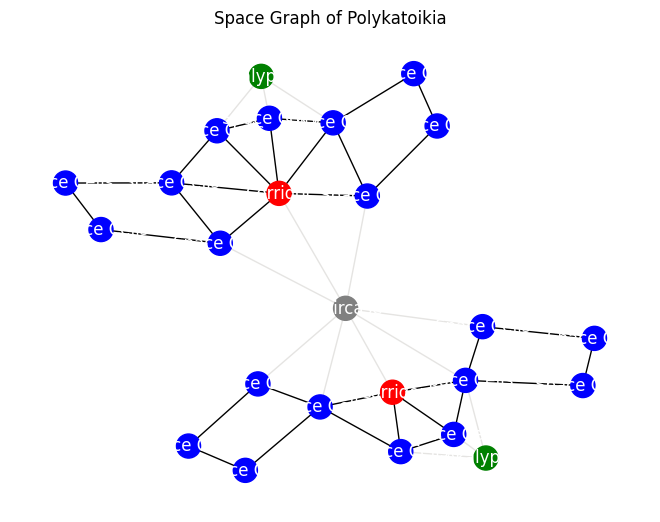

In [24]:
# Visualize graph
pos = nx.spectral_layout(nx_Graph)
pos2 = nx.spring_layout(nx_Graph,iterations=100, k=0.5)

# Edges Colors
ligth_grey = (229/255, 228/255, 226/255)
ini_edge_colors = [ligth_grey for e in nx_edges]

for edge in range(len(df_edges)):
        ini_toUse_value = df_edges.iloc[edge]["toUse"]
        if ini_toUse_value == True:
                ini_edge_colors[edge] = "black"  

# Nodes Colors
nodes_color = ["blue" for n in nx_nodes]

for node in range(len(nx_nodes)):
        node_type = df_nodes.iloc[node]["type"]
        if node_type == "Akalyptos":
                nodes_color[node] = "green"
        elif node_type == "Staircase":
                nodes_color[node] = "grey"
        elif node_type == "Corridor":
                nodes_color[node] = "red"
                

labels = {node: data['type'] for node, data in nx_nodes}

nx.draw(nx_Graph,
        pos2,
        with_labels=True,
        font_color = "white",
        edge_color = ini_edge_colors,
        node_color = nodes_color,
        labels = labels)

# Add a title to the plot
plt.title("Space Graph of Polykatoikia", color="Black")  # Set the title with white text


# Show the plot
plt.show()

Create Subgraphs

In [25]:
# Subgraphs
def number_of_apartments(nodes):
    '''Determines teh number of apartements'''
    clean_node_list = set() 

    for node, data in nx_nodes:
        apartment_index = data["apartment"]
        
        if apartment_index != "none":
            clean_node_list.add(apartment_index)
            
    return len(clean_node_list)

def create_subgraph(nodes,edges,apartment_index):
    '''Return the nodes and edges of a subgraph: (nodes, edges)'''
    
    subgraph_nodes = []
    subgraph_edges = []

    for node,data in nodes:
        index = data["apartment"]
        
        if index == apartment_index:
            subgraph_nodes.append((node,data))

    for node1, node2, data in edges:
        for node,data in nodes:
            if node == node1:
                node1_apartment_index = data["apartment"]
            elif node == node2:
                node2_apartment_index = data["apartment"]
         
        if node1_apartment_index == apartment_index and node2_apartment_index ==apartment_index :
            subgraph_edges.append((node1,node2,data))
    

    return subgraph_nodes,subgraph_edges
    



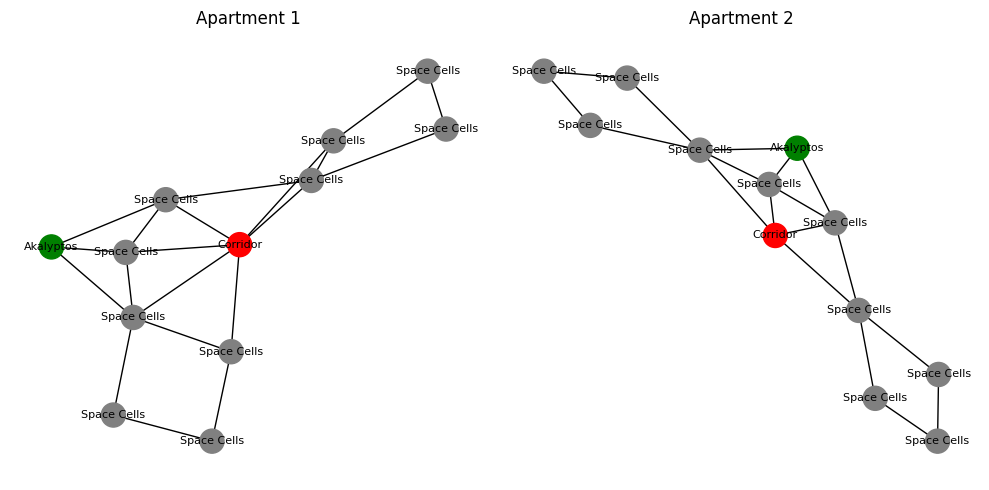

In [26]:

# Set the number of subplots in a grid (rows and cols based on number of subgraphs)
number_of_subgraphs = number_of_apartments(nx_nodes)  # Assuming you have this function

# Determine subplot grid dimensions (e.g., 2 columns, rows calculated based on the number of subgraphs)
n_cols = 2
n_rows = (number_of_subgraphs + n_cols - 1) // n_cols  # Calculate rows required based on number of subgraphs

# Create a figure with a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))  # Adjust figsize for the plot layout

# Flatten axes array to iterate easily
axes = axes.flatten()

# Save subgraphs
subgraph_list = []

# Iterate through the subgraphs and plot each in a different subplot
for graph in range(number_of_subgraphs):
    subgraph_nodes, subgraph_edges = create_subgraph(nx_nodes, nx_edges, graph)
    df_subgraph_nodes = pd.DataFrame(dict(subgraph_nodes)).transpose()

    # Create the subgraph and add nodes and edges
    subgraph = nx.Graph()
    subgraph.add_nodes_from(subgraph_nodes)
    subgraph.add_edges_from(subgraph_edges)
    subgraph_list.append(subgraph)

    # Step 1: Create the label dictionary based on the 'apartment' attribute
    labels = {node: data['type'] for node, data in subgraph_nodes}
    
    # Nodes Colors
    nodes_color = ["grey" for n in subgraph_nodes]

    for node in range(len(subgraph_nodes)):
            node_type = df_subgraph_nodes.iloc[node]["type"]
            if node_type == "Akalyptos":
                    nodes_color[node] = "green"
            elif node_type == "Staircase":
                    nodes_color[node] = "grey"
            elif node_type == "Corridor":
                    nodes_color[node] = "red"

    # Plot the subgraph in the appropriate subplot (axes[graph])
    nx.draw(subgraph,
            ax=axes[graph],  # Draw each subgraph in a separate subplot
            with_labels=True,
            labels=labels,
            node_color= nodes_color,
            font_color="black",
            font_size = 8)

    # Add a title to each subplot (you can customize the title logic here)
    axes[graph].set_title(f"Apartment {graph + 1}")

# If there are fewer subgraphs than the total number of axes (i.e., empty subplots), hide the extra axes
for i in range(number_of_subgraphs, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the entire figure with all subgraphs and titles
plt.show()

Filter nodes to "Space Cells"

In [27]:
pd.DataFrame(dict(subgraph_nodes)).transpose()

apartment         type          x         y     z  \
2          1  Space Cells  17.634283  4.900683  10.0   
4          1  Space Cells   7.081439     1.965  10.0   
8          1  Space Cells  12.452433  1.987838  10.0   
9          1  Space Cells  14.871856  1.960205  10.0   
10         1  Space Cells   7.081439  4.900683  10.0   
11         1     Corridor   11.43466  3.420715  10.0   
13         1  Space Cells   9.925599  1.487905  10.0   
14         1  Space Cells   2.633595  4.900683  10.0   
17         1  Space Cells  14.881099  4.900683  10.0   
18         1  Space Cells   2.633594     1.965  10.0   
21         1  Space Cells  17.634283     1.965  10.0   
24         1    Akalyptos  12.452345       0.5  10.0   

                                            pos index  
2     [-0.7657918481076339, 0.8476034239493907]     2  
4    [0.011720155766075172, 0.5733605922018484]     4  
8    [-0.5326668805730087, 0.31718071162821765]     8  
9   [-0.46364584896278166, 0.40415986052671804]     9  
10    [0.25440714838247885, 0.5459988281395883]    10  
11   [-0.2247700689105238, 0.37733702317619644]    11  
13    [-0.3284683286620147, 0.5618841368821995]    13  
14     [0.4472972442613966, 0.8830724053650051]    14  
17    [-0.44019782789066514, 0.568263075671899]    17  
18     [0.2220703783136602, 0.9353936394517657]    18  
21    [-0.8544646598938529, 0.6437191797927532]    21  
24   [-0.6663718249845972, 0.48872408778189924]    24

### Generate all graphs combinations

**Find all valid combination of edges**

In [28]:
num_combinations_graphs = []
max_matching_graphs = []
nodes_index_in_edge_graphs = []

for graph in subgraph_list:
    # Find the maximum number of matching where no node occurs more than once
    max_matching = nx.max_weight_matching(graph, maxcardinality=True)
    max_matching_graphs.append(max_matching)

    # Get the nodes index of each edges 
    nodes_index_in_edge = [edge[:2] for index,edge in enumerate(list(graph.edges()))]
    nodes_index_in_edge_graphs.append(nodes_index_in_edge)

    # Max number of combination
    num_combinations = math.comb(len(nodes_index_in_edge),len(max_matching))
    num_combinations_graphs.append(num_combinations)

In [29]:
num_combinations_graphs

[38760, 18564]

In [30]:
 # Save all valid combinations
all_matchings = []
    
for graph in range(len(num_combinations_graphs)):
    valid_matchings =[]
    # Evaluate all possible combination and save only the valid one
    for combination in itertools.combinations(nodes_index_in_edge_graphs[graph], len(max_matching_graphs[graph])):
            if is_valid_matching(combination):
                valid_matchings.append(combination)
    all_matchings.append(valid_matchings)

all_matchings

[[((0, 23), (1, 12), (5, 6), (7, 16), (15, 19), (20, 22)),
  ((0, 23), (1, 12), (5, 7), (6, 16), (15, 19), (20, 22)),
  ((0, 23), (1, 20), (5, 6), (7, 16), (12, 22), (15, 19)),
  ((0, 23), (1, 20), (5, 7), (6, 16), (12, 22), (15, 19)),
  ((0, 23), (1, 15), (5, 6), (7, 16), (12, 19), (20, 22)),
  ((0, 23), (1, 15), (5, 7), (6, 16), (12, 19), (20, 22)),
  ((0, 19), (1, 15), (5, 6), (7, 16), (12, 23), (20, 22)),
  ((0, 19), (1, 15), (5, 7), (6, 16), (12, 23), (20, 22)),
  ((0, 5), (1, 12), (6, 16), (7, 15), (19, 23), (20, 22)),
  ((0, 5), (1, 20), (6, 16), (7, 15), (12, 22), (19, 23)),
  ((0, 15), (1, 12), (5, 6), (7, 16), (19, 23), (20, 22)),
  ((0, 15), (1, 12), (5, 7), (6, 16), (19, 23), (20, 22)),
  ((0, 15), (1, 20), (5, 6), (7, 16), (12, 22), (19, 23)),
  ((0, 15), (1, 20), (5, 7), (6, 16), (12, 22), (19, 23))],
 [((2, 21), (4, 18), (8, 11), (9, 17), (10, 14), (13, 24)),
  ((2, 21), (4, 18), (8, 24), (9, 17), (10, 14), (11, 13)),
  ((2, 21), (4, 10), (8, 11), (9, 17), (13, 24), (14,

**Visualize valid combinations**

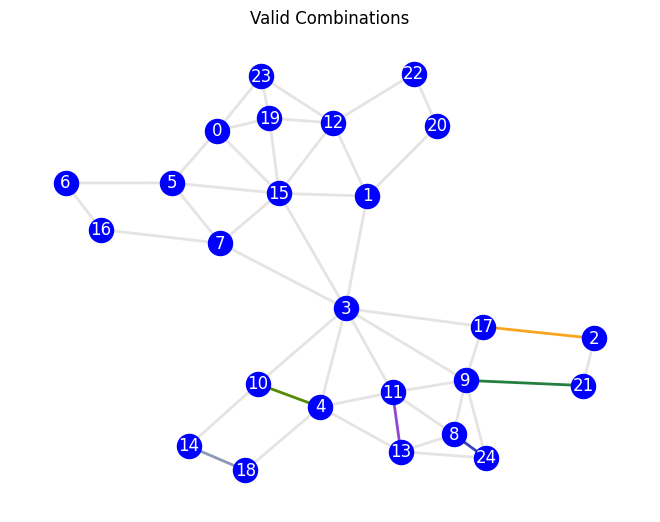

In [31]:

# Edge Colors
ligth_grey = (229/255, 228/255, 226/255)
# edge_colors = [ligth_grey for e in nx_edges]

for graph in range(number_of_subgraphs): 
    for i,matching in enumerate(all_matchings[graph]):
        edge_colors = [ligth_grey for e in nx_edges]
        for combination in matching:
            edge = select_edge(nx_edges,combination)[1]
            edge_index = select_edge(nx_edges,combination)[0]
            edge_colors[edge_index] = random_color()
            
        # Clear the output of the current cell
        clear_output(wait=True)

        # Save Plot
        # plt.savefig()

        # Draw the graph with the specified node colors
        nx.draw(nx_Graph, pos2, with_labels=True, node_color = "blue", edge_color = edge_colors, width = 2, font_color = "white")   

        # Title
        plt.title("Valid Combinations")

        # Pause
        plt.pause(.1)     
    


### New Graph

In [32]:
# Create new nodes
valid_combinations = all_matchings
valid_combinations

[[((0, 23), (1, 12), (5, 6), (7, 16), (15, 19), (20, 22)),
  ((0, 23), (1, 12), (5, 7), (6, 16), (15, 19), (20, 22)),
  ((0, 23), (1, 20), (5, 6), (7, 16), (12, 22), (15, 19)),
  ((0, 23), (1, 20), (5, 7), (6, 16), (12, 22), (15, 19)),
  ((0, 23), (1, 15), (5, 6), (7, 16), (12, 19), (20, 22)),
  ((0, 23), (1, 15), (5, 7), (6, 16), (12, 19), (20, 22)),
  ((0, 19), (1, 15), (5, 6), (7, 16), (12, 23), (20, 22)),
  ((0, 19), (1, 15), (5, 7), (6, 16), (12, 23), (20, 22)),
  ((0, 5), (1, 12), (6, 16), (7, 15), (19, 23), (20, 22)),
  ((0, 5), (1, 20), (6, 16), (7, 15), (12, 22), (19, 23)),
  ((0, 15), (1, 12), (5, 6), (7, 16), (19, 23), (20, 22)),
  ((0, 15), (1, 12), (5, 7), (6, 16), (19, 23), (20, 22)),
  ((0, 15), (1, 20), (5, 6), (7, 16), (12, 22), (19, 23)),
  ((0, 15), (1, 20), (5, 7), (6, 16), (12, 22), (19, 23))],
 [((2, 21), (4, 18), (8, 11), (9, 17), (10, 14), (13, 24)),
  ((2, 21), (4, 18), (8, 24), (9, 17), (10, 14), (11, 13)),
  ((2, 21), (4, 10), (8, 11), (9, 17), (13, 24), (14,

In [33]:
def create_new_node_dictionary(node1_index, node2_index, adjacent_nodes):
    new_node =  {"nodes_combined":[node1_index["index"],node2_index["index"]],
                        "nodes_coord" : [[node1_index["x"],node1_index["y"],node1_index["z"]],[node2_index["x"],node2_index["y"],node2_index["z"]]],
                        "adjacent_nodes":adjacent_nodes}
    
    return new_node

In [34]:
def adjacent_nodes(graph = nx.Graph(), node_index = None):
    '''Return a list of node index'''
    adj_nodes = nx_Graph.neighbors(node_index)
    
    return list(adj_nodes)

In [35]:
def unique_adjacent_nodes(node1, node2, adjacent_node1, adjacent_node2):
    
    combined_adjacent_nodes = adjacent_node1 + adjacent_node2
    
    if  node1 in combined_adjacent_nodes:
        combined_adjacent_nodes.remove(node1)
        
    if  node2 in combined_adjacent_nodes:
        combined_adjacent_nodes.remove(node2)
    
    return combined_adjacent_nodes

In [36]:
def unique_edge(edge_list):
    # Remove duplicated edges
    unique_edges =[]
    seen_edges = set()

    for u,v,attr in edge_list:
        edge = tuple(sorted([u,v]))
        
        if edge not in seen_edges:
            seen_edges.add(edge)
            unique_edges.append((u,v,attr))
    
    return unique_edges

#### Create nodes of the new graph

Each new node is the combination of the 2 nodes of each edge.

In [37]:
# New graphs nodes lists
new_graphs_nodes_list_graph =[] 

for graph in range(number_of_subgraphs):
    new_graphs_nodes_list = []

    # Iterate throught all valid combinations
    for combination in valid_combinations[graph]:
        
        new_node_dict = {}
        # For each valid combination
        for index,edge in enumerate(combination):
            
            # Node1
            node1_index = edge[0]
            node1 = find_node(nx_Graph,node1_index)
            
            # Node2
            node2_index = edge[1]
            node2 = find_node(nx_Graph,node2_index)
            
            # Neighbours of node1
            node1_neighbours = adjacent_nodes(nx_Graph,node1_index)
            
            # Neighbours of node2
            node2_neighbours = adjacent_nodes(nx_Graph,node2_index)
            
            # Unique neighbours of node1 and node2
            unique_neighbors = unique_adjacent_nodes(node1_index, node2_index, node1_neighbours, node2_neighbours)
            
            # Create new node dictionary
            new_node = create_new_node_dictionary(node1,node2,unique_neighbors)
            
            new_node_dict[index] = new_node
        
        # Add nodes' graph to the list of all graphs
        new_graphs_nodes_list.append(new_node_dict)

    # Number of node lists
    len_new_nodes_lists = len(new_graphs_nodes_list)
    
    # Append to graph list
    new_graphs_nodes_list_graph.append(new_graphs_nodes_list)




Concatenate Dataframes

In [38]:
# Initialize a list to hold concatenated DataFrames
concatenated_dfs = []

# Find the maximum length of any list in `data`
max_len = max(len(d) for d in new_graphs_nodes_list_graph)

# Iterate over the range of the maximum length
for i in range(max_len):
    # Collect DataFrames for index `i` if available, otherwise create an empty DataFrame for missing ones
    dfs = []
    for d in new_graphs_nodes_list_graph:
        if i < len(d):  # If the list has data for this index
            dfs.append(pd.DataFrame(d[i]).transpose())
        else:
            # Create an empty DataFrame with columns for consistency
            dfs.append(pd.DataFrame(columns=['nodes_combined', 'nodes_coord', 'adjacent_nodes']))
    
    # Concatenate DataFrames along the rows (axis=0) using outer join to handle different shapes
    concatenated_df = pd.concat(dfs, axis=0, join='outer')
    concatenated_df = concatenated_df.reset_index()
    
    # Append the concatenated DataFrame to the list
    concatenated_dfs.append(concatenated_df)
#

In [39]:
pd.DataFrame(dict(new_graphs_nodes_list_graph[1][3])).transpose()

nodes_combined                                        nodes_coord  \
0        [2, 21]  [[17.634283, 4.900683, 10.0], [17.634283, 1.96...   
1        [4, 10]  [[7.081439, 1.965, 10.0], [7.081439, 4.900683,...   
2        [8, 24]  [[12.452433, 1.987838, 10.0], [12.452345, 0.5,...   
3        [9, 17]  [[14.871856, 1.960205, 10.0], [14.881099, 4.90...   
4       [11, 13]  [[11.43466, 3.420715, 10.0], [9.925599, 1.4879...   
5       [14, 18]  [[2.633595, 4.900683, 10.0], [2.633594, 1.965,...   

             adjacent_nodes  
0                   [17, 9]  
1    [3, 18, 11, 13, 3, 14]  
2        [9, 11, 13, 9, 13]  
3  [3, 8, 21, 11, 24, 2, 3]  
4    [3, 4, 8, 9, 4, 8, 24]  
5                   [10, 4]

#### Create edges of the new graph
1.	Identify Adjacent Nodes: For each new node (which is a combination of two original nodes), we look at its adjacent nodes. The adjacent nodes are those that are directly connected to the nodes within the combination in the original graph.
2.	Check for Connections: For each new node, check if any of its adjacent nodes in the original graph share a node with any of the other combined nodes in the new node. If they do, this means there is a connection between the new node and another new node, and hence, an edge should be created between them in the new graph.
3.	Create Edges: If the above condition is satisfied, create an edge between the current new node and the adjacent new node. This edge in the new graph represents the connection between the corresponding combined nodes in the original graph.

In [40]:
# New graphs nodes lists
new_graphs_edges_list_graph =[] 

for graph in range(number_of_subgraphs):
    new_graphs_edges_list = []

    # Iterate through all graph nodes list
    for nodes_list in new_graphs_nodes_list:
        new_edge_dict = []
        edge_index = 0

        for i in nodes_list:
            node1_i = nodes_list[i]["nodes_combined"][0]
            node2_i = nodes_list[i]["nodes_combined"][1]

            for j in nodes_list: 
                if i == j:
                    continue
                
                # List of adjacent nodes
                adjacent_nodes_j = nodes_list[j]["adjacent_nodes"]

                # Add node to list if it exist in the list of adjacent nodes
                if node1_i in adjacent_nodes_j or node2_i in adjacent_nodes_j:
                    new_edge_dict.append((i,j, {"edge_index":edge_index}))
                    edge_index += 1
                    
        # Filter the edges to get only the unique one (ex. instead of have (0,1) and (1,0) we will only have one of those)
        unique_edges = unique_edge(new_edge_dict)

        # Add graph edges to the graphs list
        new_graphs_edges_list.append(unique_edges)

    # Number of edge lists
    len_new_edges_lists = len(new_graphs_edges_list)

    new_graphs_edges_list_graph.append(new_graphs_edges_list)

In [41]:
# Find the maximum length of any list in `new_graphs_edges_list_graph`
max_len = max(len(d) for d in new_graphs_edges_list_graph)


for i in range(max_len):
    convert_edges_to_df(new_graphs_edges_list_graph[0][i])

In [42]:
# Initialize a list to hold concatenated DataFrames
concatenated_dfs_edges = []

# Find the maximum length of any list in `new_graphs_edges_list_graph`
max_len = max(len(d) for d in new_graphs_edges_list_graph)

# Iterate over the range of the maximum length
for i in range(max_len):
    # Collect DataFrames for index `i` if available, otherwise create an empty DataFrame for missing ones
    dfs = []
    for d in new_graphs_edges_list_graph:
        if i < len(d):  # If the list has data for this index
            # Convert the edge data for the current graph at index `i` to a DataFrame
            dfs.append(convert_edges_to_df(new_graphs_edges_list_graph[0][i]))
        else:
            # Create an empty DataFrame with columns for consistency
            dfs.append(pd.DataFrame(columns=['node1', 'node2', 'edge_index']))
    
    # Concatenate DataFrames along the rows (axis=0) using outer join to handle different shapes
    concatenated_df = pd.concat(dfs, axis=0, join='outer')
    
    # Append the concatenated DataFrame to the list
    concatenated_dfs_edges.append(concatenated_df)

In [43]:
df_new_edges = convert_edges_to_df(new_graphs_edges_list_graph[0][0])
df_new_edges

node1  node2  edge_index
0      0      3           0
1      1      2           1
2      1      4           2
3      1      5           3
4      2      3           5
5      2      5           6
6      3      5           9

#### Create new graph

In [44]:
max_edge = max(len(edge) for edge in new_graphs_edges_list_graph[1])
max_edge

7

In [48]:
for graph in range(number_of_subgraphs):
    new_graphs_nodes_edges = {}
    graph_index = 0

    max_node = max(len(node) for node in new_graphs_nodes_list_graph[graph])
    max_edge = max(len(edge) for edge in new_graphs_edges_list_graph[graph])
    
    
    # if len_new_nodes_lists == len_new_edges_lists: 
    for edge in range(max_edge):
        edges = new_graphs_edges_list_graph[graph][edge]
    
    for nodes in range(max_node):
        nodes = new_graphs_nodes_list_graph[graph][nodes]
    
    new_graphs_nodes_edges[f"Graph{graph_index}"]=  {
        "Nodes": nodes,
        "Edges": edges
    }
    graph_index += 1   

    print(new_graphs_nodes_edges.keys())

dict_keys(['Graph0'])
dict_keys(['Graph0'])


In [50]:
new_graphs_nodes_edges_graphs = []

for graph in range(number_of_subgraphs):
    new_graphs_nodes_edges = {}
    graph_index = 0
    
    # if len_new_nodes_lists == len_new_edges_lists: 
    for i,node in enumerate(new_graphs_nodes_list_graph[graph]):
        new_graphs_nodes_edges[f"Graph{graph_index}"]=  {
            "Nodes": new_graphs_nodes_list_graph[graph][i],
            "Edges": new_graphs_edges_list_graph[graph][i]
        }
        graph_index += 1   
    new_graphs_nodes_edges_graphs.append(new_graphs_nodes_edges)
    print(new_graphs_nodes_edges.keys())

0


IndexError: list index out of range

{0: {'nodes_combined': [1, 7], 'nodes_coord': [[17.634283, 6.900683, 10.0], [14.881099, 6.900683, 10.0]], 'adjacent_nodes': [14, 4, 5, 13]}, 1: {'nodes_combined': [2, 13], 'nodes_coord': [[12.452524, 9.746953, 10.0], [11.434664, 8.243339, 10.0]], 'adjacent_nodes': [4, 23, 10, 4, 5, 7, 18, 17, 23]}, 2: {'nodes_combined': [4, 14], 'nodes_coord': [[14.871457, 9.839343, 10.0], [17.634283, 9.835, 10.0]], 'adjacent_nodes': [2, 7, 13, 10, 1]}, 3: {'nodes_combined': [10, 23], 'nodes_coord': [[12.452521, 11.307788, 10.0], [9.92572, 10.249178, 10.0]], 'adjacent_nodes': [2, 4, 2, 13, 17]}, 4: {'nodes_combined': [12, 17], 'nodes_coord': [[2.633595, 9.835, 10.0], [7.081441, 9.835, 10.0]], 'adjacent_nodes': [19, 13, 18, 23]}, 5: {'nodes_combined': [18, 19], 'nodes_coord': [[7.081439, 6.900683, 10.0], [2.633595, 6.900683, 10.0]], 'adjacent_nodes': [5, 13, 17, 12]}}


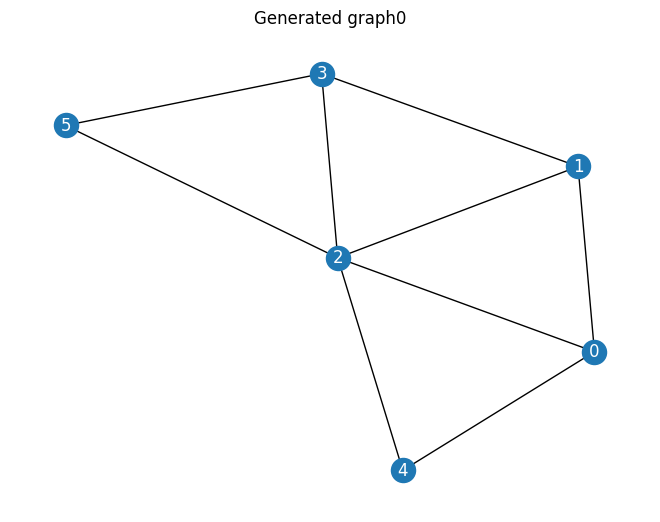

{0: {'nodes_combined': [1, 7], 'nodes_coord': [[17.634283, 6.900683, 10.0], [14.881099, 6.900683, 10.0]], 'adjacent_nodes': [14, 4, 5, 13]}, 1: {'nodes_combined': [2, 13], 'nodes_coord': [[12.452524, 9.746953, 10.0], [11.434664, 8.243339, 10.0]], 'adjacent_nodes': [4, 23, 10, 4, 5, 7, 18, 17, 23]}, 2: {'nodes_combined': [4, 14], 'nodes_coord': [[14.871457, 9.839343, 10.0], [17.634283, 9.835, 10.0]], 'adjacent_nodes': [2, 7, 13, 10, 1]}, 3: {'nodes_combined': [10, 23], 'nodes_coord': [[12.452521, 11.307788, 10.0], [9.92572, 10.249178, 10.0]], 'adjacent_nodes': [2, 4, 2, 13, 17]}, 4: {'nodes_combined': [12, 19], 'nodes_coord': [[2.633595, 9.835, 10.0], [2.633595, 6.900683, 10.0]], 'adjacent_nodes': [17, 18]}, 5: {'nodes_combined': [17, 18], 'nodes_coord': [[7.081441, 9.835, 10.0], [7.081439, 6.900683, 10.0]], 'adjacent_nodes': [12, 13, 23, 5, 13, 19]}}


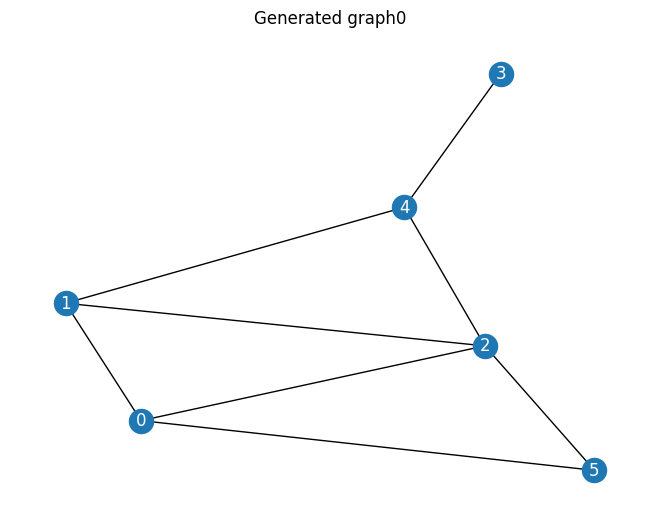

{0: {'nodes_combined': [1, 7], 'nodes_coord': [[17.634283, 6.900683, 10.0], [14.881099, 6.900683, 10.0]], 'adjacent_nodes': [14, 4, 5, 13]}, 1: {'nodes_combined': [2, 10], 'nodes_coord': [[12.452524, 9.746953, 10.0], [12.452521, 11.307788, 10.0]], 'adjacent_nodes': [4, 13, 23, 4, 23]}, 2: {'nodes_combined': [4, 14], 'nodes_coord': [[14.871457, 9.839343, 10.0], [17.634283, 9.835, 10.0]], 'adjacent_nodes': [2, 7, 13, 10, 1]}, 3: {'nodes_combined': [12, 17], 'nodes_coord': [[2.633595, 9.835, 10.0], [7.081441, 9.835, 10.0]], 'adjacent_nodes': [19, 13, 18, 23]}, 4: {'nodes_combined': [13, 23], 'nodes_coord': [[11.434664, 8.243339, 10.0], [9.92572, 10.249178, 10.0]], 'adjacent_nodes': [2, 4, 5, 7, 18, 17, 2, 10, 17]}, 5: {'nodes_combined': [18, 19], 'nodes_coord': [[7.081439, 6.900683, 10.0], [2.633595, 6.900683, 10.0]], 'adjacent_nodes': [5, 13, 17, 12]}}


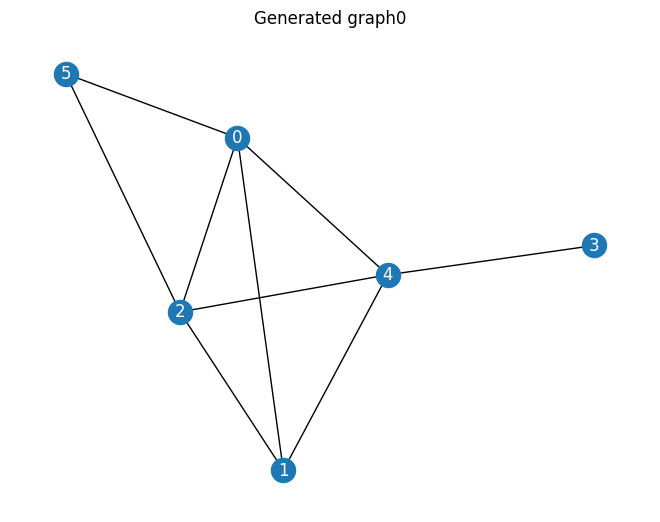

{0: {'nodes_combined': [1, 7], 'nodes_coord': [[17.634283, 6.900683, 10.0], [14.881099, 6.900683, 10.0]], 'adjacent_nodes': [14, 4, 5, 13]}, 1: {'nodes_combined': [2, 10], 'nodes_coord': [[12.452524, 9.746953, 10.0], [12.452521, 11.307788, 10.0]], 'adjacent_nodes': [4, 13, 23, 4, 23]}, 2: {'nodes_combined': [4, 14], 'nodes_coord': [[14.871457, 9.839343, 10.0], [17.634283, 9.835, 10.0]], 'adjacent_nodes': [2, 7, 13, 10, 1]}, 3: {'nodes_combined': [12, 19], 'nodes_coord': [[2.633595, 9.835, 10.0], [2.633595, 6.900683, 10.0]], 'adjacent_nodes': [17, 18]}, 4: {'nodes_combined': [13, 18], 'nodes_coord': [[11.434664, 8.243339, 10.0], [7.081439, 6.900683, 10.0]], 'adjacent_nodes': [2, 4, 5, 7, 17, 23, 5, 17, 19]}, 5: {'nodes_combined': [17, 23], 'nodes_coord': [[7.081441, 9.835, 10.0], [9.92572, 10.249178, 10.0]], 'adjacent_nodes': [12, 13, 18, 2, 10, 13]}}


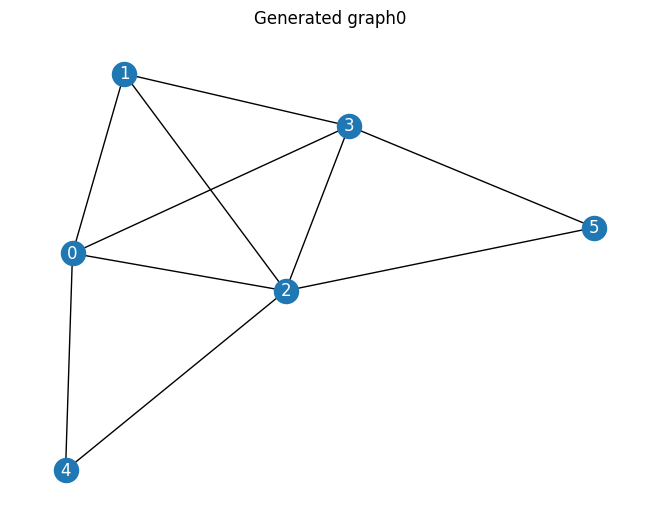

{0: {'nodes_combined': [1, 7], 'nodes_coord': [[17.634283, 6.900683, 10.0], [14.881099, 6.900683, 10.0]], 'adjacent_nodes': [14, 4, 5, 13]}, 1: {'nodes_combined': [2, 10], 'nodes_coord': [[12.452524, 9.746953, 10.0], [12.452521, 11.307788, 10.0]], 'adjacent_nodes': [4, 13, 23, 4, 23]}, 2: {'nodes_combined': [4, 14], 'nodes_coord': [[14.871457, 9.839343, 10.0], [17.634283, 9.835, 10.0]], 'adjacent_nodes': [2, 7, 13, 10, 1]}, 3: {'nodes_combined': [12, 19], 'nodes_coord': [[2.633595, 9.835, 10.0], [2.633595, 6.900683, 10.0]], 'adjacent_nodes': [17, 18]}, 4: {'nodes_combined': [13, 23], 'nodes_coord': [[11.434664, 8.243339, 10.0], [9.92572, 10.249178, 10.0]], 'adjacent_nodes': [2, 4, 5, 7, 18, 17, 2, 10, 17]}, 5: {'nodes_combined': [17, 18], 'nodes_coord': [[7.081441, 9.835, 10.0], [7.081439, 6.900683, 10.0]], 'adjacent_nodes': [12, 13, 23, 5, 13, 19]}}


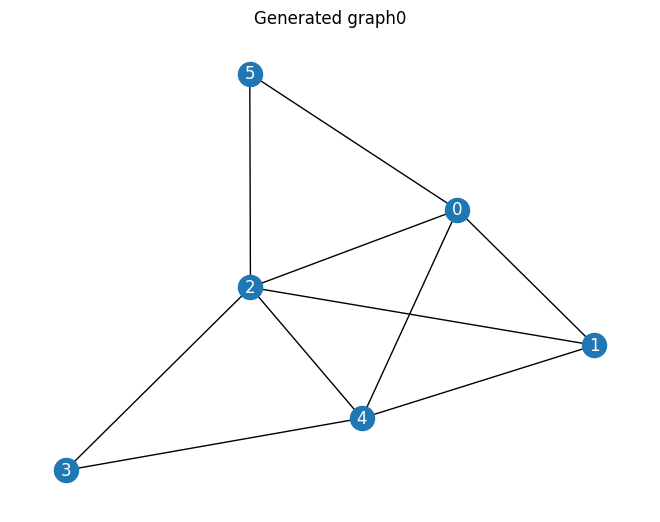

{0: {'nodes_combined': [1, 14], 'nodes_coord': [[17.634283, 6.900683, 10.0], [17.634283, 9.835, 10.0]], 'adjacent_nodes': [7, 4]}, 1: {'nodes_combined': [2, 4], 'nodes_coord': [[12.452524, 9.746953, 10.0], [14.871457, 9.839343, 10.0]], 'adjacent_nodes': [13, 23, 10, 7, 13, 14, 10]}, 2: {'nodes_combined': [7, 13], 'nodes_coord': [[14.881099, 6.900683, 10.0], [11.434664, 8.243339, 10.0]], 'adjacent_nodes': [1, 4, 5, 2, 4, 5, 18, 17, 23]}, 3: {'nodes_combined': [10, 23], 'nodes_coord': [[12.452521, 11.307788, 10.0], [9.92572, 10.249178, 10.0]], 'adjacent_nodes': [2, 4, 2, 13, 17]}, 4: {'nodes_combined': [12, 17], 'nodes_coord': [[2.633595, 9.835, 10.0], [7.081441, 9.835, 10.0]], 'adjacent_nodes': [19, 13, 18, 23]}, 5: {'nodes_combined': [18, 19], 'nodes_coord': [[7.081439, 6.900683, 10.0], [2.633595, 6.900683, 10.0]], 'adjacent_nodes': [5, 13, 17, 12]}}


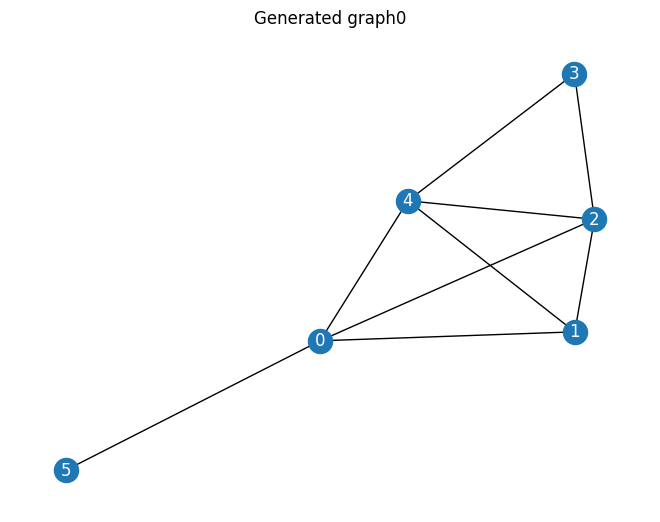

{0: {'nodes_combined': [1, 14], 'nodes_coord': [[17.634283, 6.900683, 10.0], [17.634283, 9.835, 10.0]], 'adjacent_nodes': [7, 4]}, 1: {'nodes_combined': [2, 4], 'nodes_coord': [[12.452524, 9.746953, 10.0], [14.871457, 9.839343, 10.0]], 'adjacent_nodes': [13, 23, 10, 7, 13, 14, 10]}, 2: {'nodes_combined': [7, 13], 'nodes_coord': [[14.881099, 6.900683, 10.0], [11.434664, 8.243339, 10.0]], 'adjacent_nodes': [1, 4, 5, 2, 4, 5, 18, 17, 23]}, 3: {'nodes_combined': [10, 23], 'nodes_coord': [[12.452521, 11.307788, 10.0], [9.92572, 10.249178, 10.0]], 'adjacent_nodes': [2, 4, 2, 13, 17]}, 4: {'nodes_combined': [12, 19], 'nodes_coord': [[2.633595, 9.835, 10.0], [2.633595, 6.900683, 10.0]], 'adjacent_nodes': [17, 18]}, 5: {'nodes_combined': [17, 18], 'nodes_coord': [[7.081441, 9.835, 10.0], [7.081439, 6.900683, 10.0]], 'adjacent_nodes': [12, 13, 23, 5, 13, 19]}}


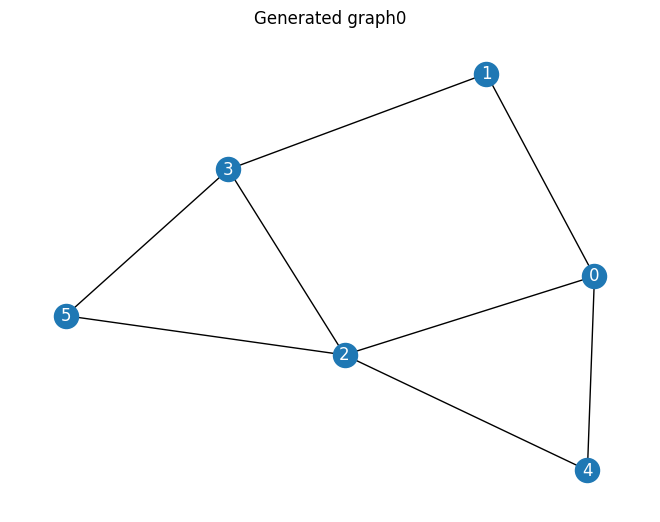

{0: {'nodes_combined': [1, 14], 'nodes_coord': [[17.634283, 6.900683, 10.0], [17.634283, 9.835, 10.0]], 'adjacent_nodes': [7, 4]}, 1: {'nodes_combined': [2, 13], 'nodes_coord': [[12.452524, 9.746953, 10.0], [11.434664, 8.243339, 10.0]], 'adjacent_nodes': [4, 23, 10, 4, 5, 7, 18, 17, 23]}, 2: {'nodes_combined': [4, 7], 'nodes_coord': [[14.871457, 9.839343, 10.0], [14.881099, 6.900683, 10.0]], 'adjacent_nodes': [2, 13, 14, 10, 1, 5, 13]}, 3: {'nodes_combined': [10, 23], 'nodes_coord': [[12.452521, 11.307788, 10.0], [9.92572, 10.249178, 10.0]], 'adjacent_nodes': [2, 4, 2, 13, 17]}, 4: {'nodes_combined': [12, 17], 'nodes_coord': [[2.633595, 9.835, 10.0], [7.081441, 9.835, 10.0]], 'adjacent_nodes': [19, 13, 18, 23]}, 5: {'nodes_combined': [18, 19], 'nodes_coord': [[7.081439, 6.900683, 10.0], [2.633595, 6.900683, 10.0]], 'adjacent_nodes': [5, 13, 17, 12]}}


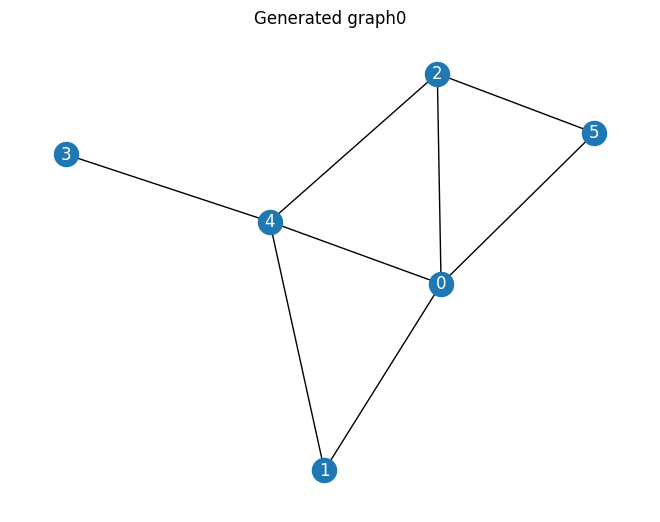

{0: {'nodes_combined': [1, 14], 'nodes_coord': [[17.634283, 6.900683, 10.0], [17.634283, 9.835, 10.0]], 'adjacent_nodes': [7, 4]}, 1: {'nodes_combined': [2, 13], 'nodes_coord': [[12.452524, 9.746953, 10.0], [11.434664, 8.243339, 10.0]], 'adjacent_nodes': [4, 23, 10, 4, 5, 7, 18, 17, 23]}, 2: {'nodes_combined': [4, 7], 'nodes_coord': [[14.871457, 9.839343, 10.0], [14.881099, 6.900683, 10.0]], 'adjacent_nodes': [2, 13, 14, 10, 1, 5, 13]}, 3: {'nodes_combined': [10, 23], 'nodes_coord': [[12.452521, 11.307788, 10.0], [9.92572, 10.249178, 10.0]], 'adjacent_nodes': [2, 4, 2, 13, 17]}, 4: {'nodes_combined': [12, 19], 'nodes_coord': [[2.633595, 9.835, 10.0], [2.633595, 6.900683, 10.0]], 'adjacent_nodes': [17, 18]}, 5: {'nodes_combined': [17, 18], 'nodes_coord': [[7.081441, 9.835, 10.0], [7.081439, 6.900683, 10.0]], 'adjacent_nodes': [12, 13, 23, 5, 13, 19]}}


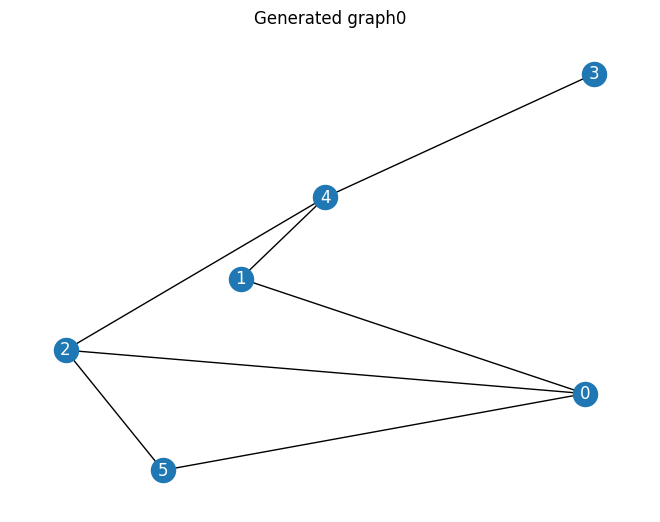

{0: {'nodes_combined': [1, 14], 'nodes_coord': [[17.634283, 6.900683, 10.0], [17.634283, 9.835, 10.0]], 'adjacent_nodes': [7, 4]}, 1: {'nodes_combined': [2, 23], 'nodes_coord': [[12.452524, 9.746953, 10.0], [9.92572, 10.249178, 10.0]], 'adjacent_nodes': [4, 13, 10, 10, 13, 17]}, 2: {'nodes_combined': [4, 10], 'nodes_coord': [[14.871457, 9.839343, 10.0], [12.452521, 11.307788, 10.0]], 'adjacent_nodes': [2, 7, 13, 14, 2, 23]}, 3: {'nodes_combined': [7, 13], 'nodes_coord': [[14.881099, 6.900683, 10.0], [11.434664, 8.243339, 10.0]], 'adjacent_nodes': [1, 4, 5, 2, 4, 5, 18, 17, 23]}, 4: {'nodes_combined': [12, 17], 'nodes_coord': [[2.633595, 9.835, 10.0], [7.081441, 9.835, 10.0]], 'adjacent_nodes': [19, 13, 18, 23]}, 5: {'nodes_combined': [18, 19], 'nodes_coord': [[7.081439, 6.900683, 10.0], [2.633595, 6.900683, 10.0]], 'adjacent_nodes': [5, 13, 17, 12]}}


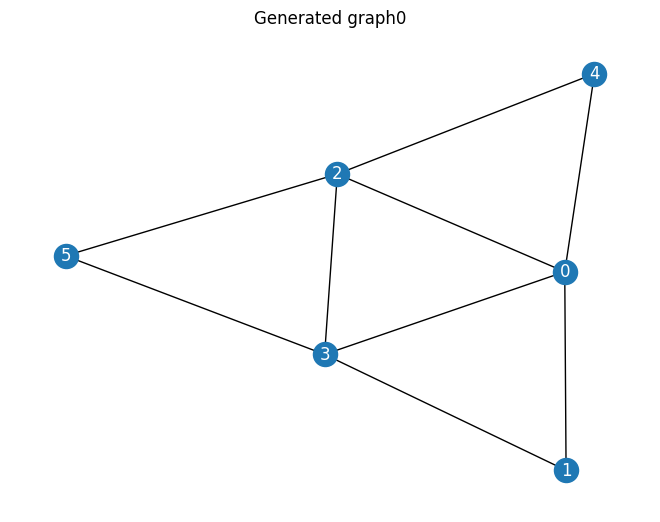

{0: {'nodes_combined': [1, 14], 'nodes_coord': [[17.634283, 6.900683, 10.0], [17.634283, 9.835, 10.0]], 'adjacent_nodes': [7, 4]}, 1: {'nodes_combined': [2, 23], 'nodes_coord': [[12.452524, 9.746953, 10.0], [9.92572, 10.249178, 10.0]], 'adjacent_nodes': [4, 13, 10, 10, 13, 17]}, 2: {'nodes_combined': [4, 10], 'nodes_coord': [[14.871457, 9.839343, 10.0], [12.452521, 11.307788, 10.0]], 'adjacent_nodes': [2, 7, 13, 14, 2, 23]}, 3: {'nodes_combined': [7, 13], 'nodes_coord': [[14.881099, 6.900683, 10.0], [11.434664, 8.243339, 10.0]], 'adjacent_nodes': [1, 4, 5, 2, 4, 5, 18, 17, 23]}, 4: {'nodes_combined': [12, 19], 'nodes_coord': [[2.633595, 9.835, 10.0], [2.633595, 6.900683, 10.0]], 'adjacent_nodes': [17, 18]}, 5: {'nodes_combined': [17, 18], 'nodes_coord': [[7.081441, 9.835, 10.0], [7.081439, 6.900683, 10.0]], 'adjacent_nodes': [12, 13, 23, 5, 13, 19]}}


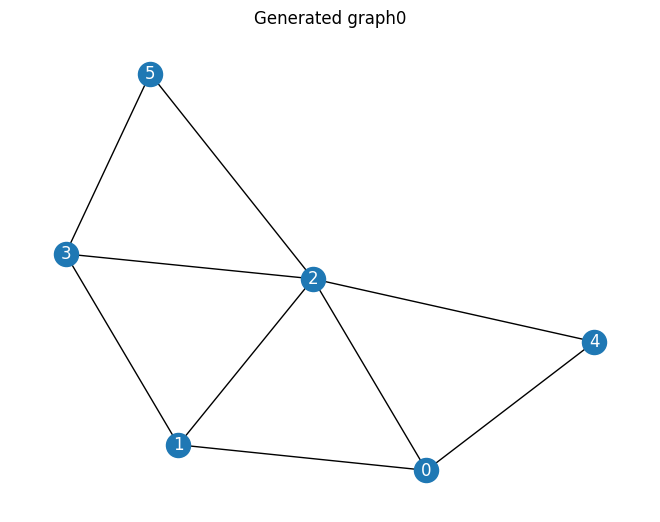

{0: {'nodes_combined': [1, 14], 'nodes_coord': [[17.634283, 6.900683, 10.0], [17.634283, 9.835, 10.0]], 'adjacent_nodes': [7, 4]}, 1: {'nodes_combined': [2, 10], 'nodes_coord': [[12.452524, 9.746953, 10.0], [12.452521, 11.307788, 10.0]], 'adjacent_nodes': [4, 13, 23, 4, 23]}, 2: {'nodes_combined': [4, 7], 'nodes_coord': [[14.871457, 9.839343, 10.0], [14.881099, 6.900683, 10.0]], 'adjacent_nodes': [2, 13, 14, 10, 1, 5, 13]}, 3: {'nodes_combined': [12, 17], 'nodes_coord': [[2.633595, 9.835, 10.0], [7.081441, 9.835, 10.0]], 'adjacent_nodes': [19, 13, 18, 23]}, 4: {'nodes_combined': [13, 23], 'nodes_coord': [[11.434664, 8.243339, 10.0], [9.92572, 10.249178, 10.0]], 'adjacent_nodes': [2, 4, 5, 7, 18, 17, 2, 10, 17]}, 5: {'nodes_combined': [18, 19], 'nodes_coord': [[7.081439, 6.900683, 10.0], [2.633595, 6.900683, 10.0]], 'adjacent_nodes': [5, 13, 17, 12]}}


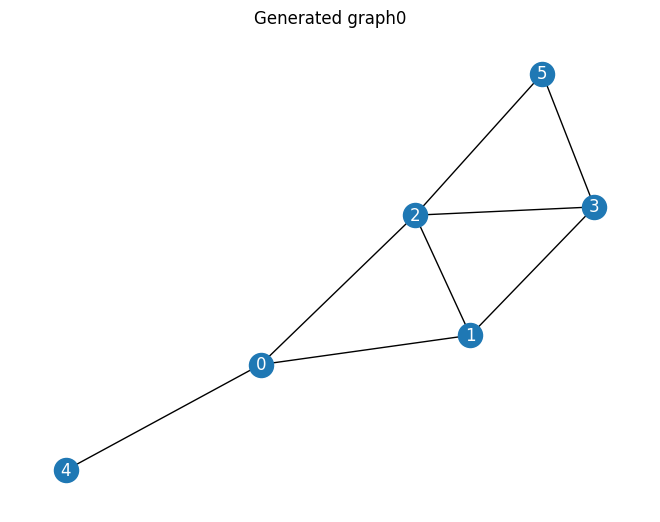

{0: {'nodes_combined': [1, 14], 'nodes_coord': [[17.634283, 6.900683, 10.0], [17.634283, 9.835, 10.0]], 'adjacent_nodes': [7, 4]}, 1: {'nodes_combined': [2, 10], 'nodes_coord': [[12.452524, 9.746953, 10.0], [12.452521, 11.307788, 10.0]], 'adjacent_nodes': [4, 13, 23, 4, 23]}, 2: {'nodes_combined': [4, 7], 'nodes_coord': [[14.871457, 9.839343, 10.0], [14.881099, 6.900683, 10.0]], 'adjacent_nodes': [2, 13, 14, 10, 1, 5, 13]}, 3: {'nodes_combined': [12, 19], 'nodes_coord': [[2.633595, 9.835, 10.0], [2.633595, 6.900683, 10.0]], 'adjacent_nodes': [17, 18]}, 4: {'nodes_combined': [13, 18], 'nodes_coord': [[11.434664, 8.243339, 10.0], [7.081439, 6.900683, 10.0]], 'adjacent_nodes': [2, 4, 5, 7, 17, 23, 5, 17, 19]}, 5: {'nodes_combined': [17, 23], 'nodes_coord': [[7.081441, 9.835, 10.0], [9.92572, 10.249178, 10.0]], 'adjacent_nodes': [12, 13, 18, 2, 10, 13]}}


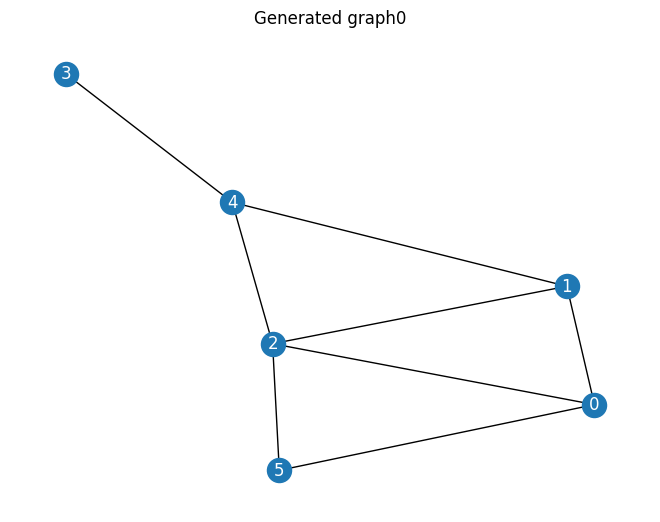

{0: {'nodes_combined': [1, 14], 'nodes_coord': [[17.634283, 6.900683, 10.0], [17.634283, 9.835, 10.0]], 'adjacent_nodes': [7, 4]}, 1: {'nodes_combined': [2, 10], 'nodes_coord': [[12.452524, 9.746953, 10.0], [12.452521, 11.307788, 10.0]], 'adjacent_nodes': [4, 13, 23, 4, 23]}, 2: {'nodes_combined': [4, 7], 'nodes_coord': [[14.871457, 9.839343, 10.0], [14.881099, 6.900683, 10.0]], 'adjacent_nodes': [2, 13, 14, 10, 1, 5, 13]}, 3: {'nodes_combined': [12, 19], 'nodes_coord': [[2.633595, 9.835, 10.0], [2.633595, 6.900683, 10.0]], 'adjacent_nodes': [17, 18]}, 4: {'nodes_combined': [13, 23], 'nodes_coord': [[11.434664, 8.243339, 10.0], [9.92572, 10.249178, 10.0]], 'adjacent_nodes': [2, 4, 5, 7, 18, 17, 2, 10, 17]}, 5: {'nodes_combined': [17, 18], 'nodes_coord': [[7.081441, 9.835, 10.0], [7.081439, 6.900683, 10.0]], 'adjacent_nodes': [12, 13, 23, 5, 13, 19]}}


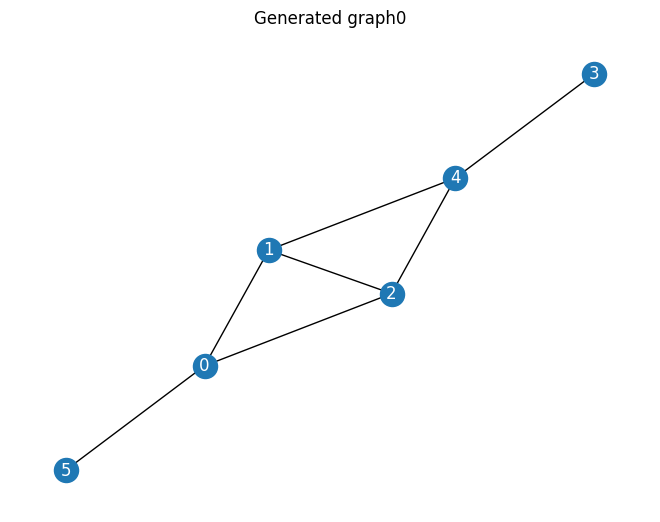

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


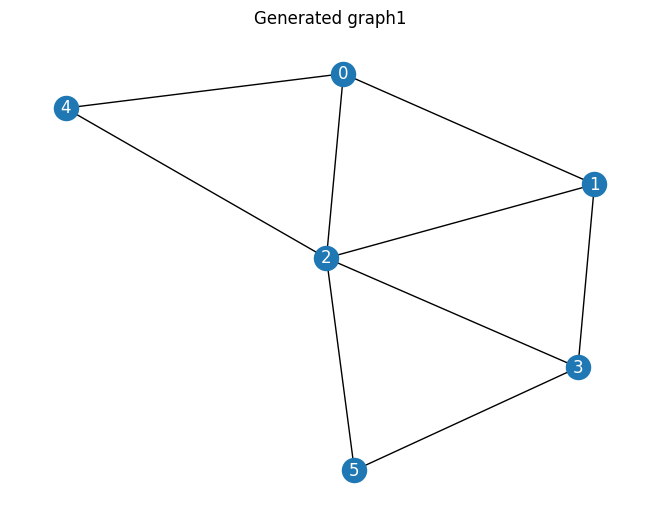

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 5: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}}


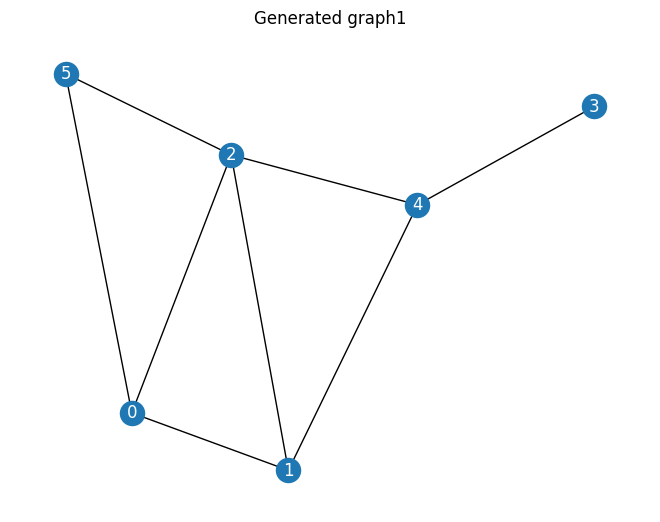

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 5: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}}


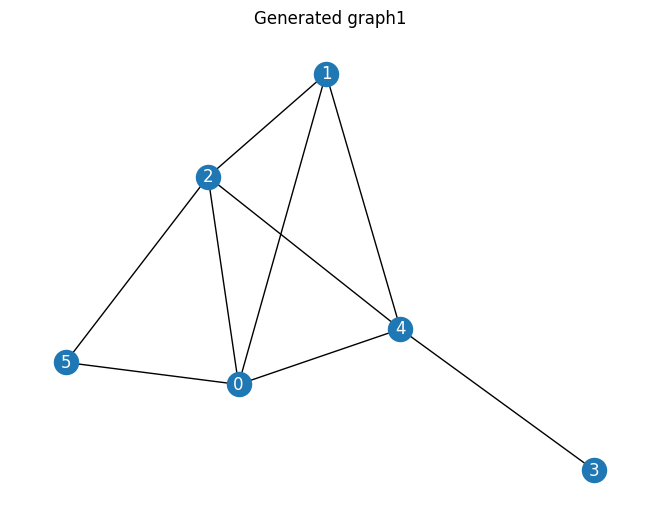

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


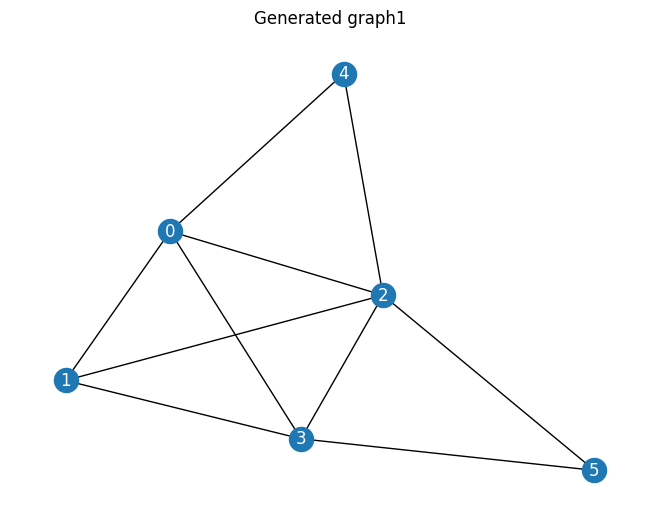

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 5: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}}


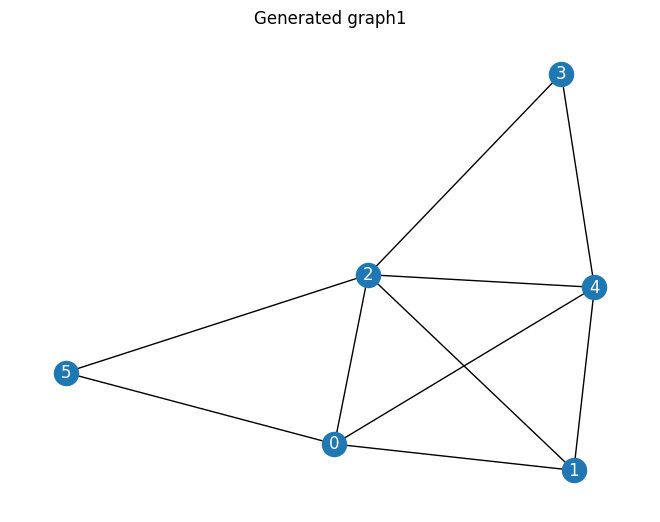

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 5: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}}


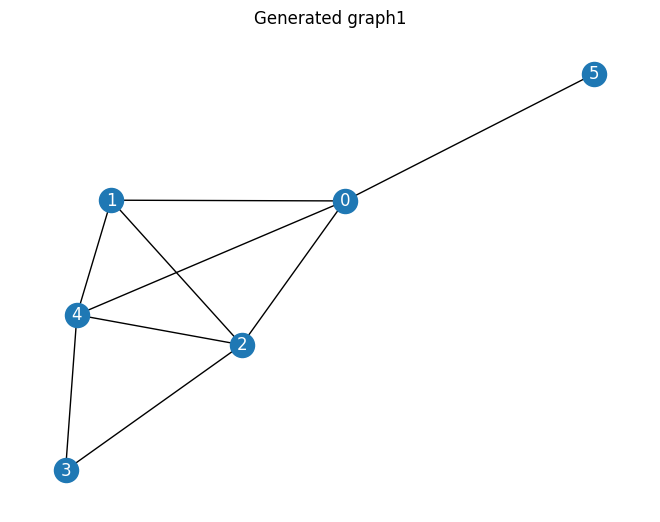

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


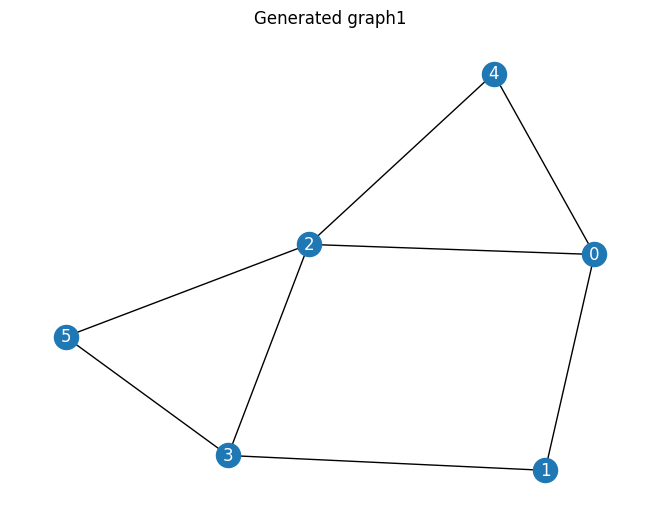

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 21], 'nodes_coord': [[7.081439, 1.965, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [5, 6, 15, 11, 3, 5, 11, 24]}, 5: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}}


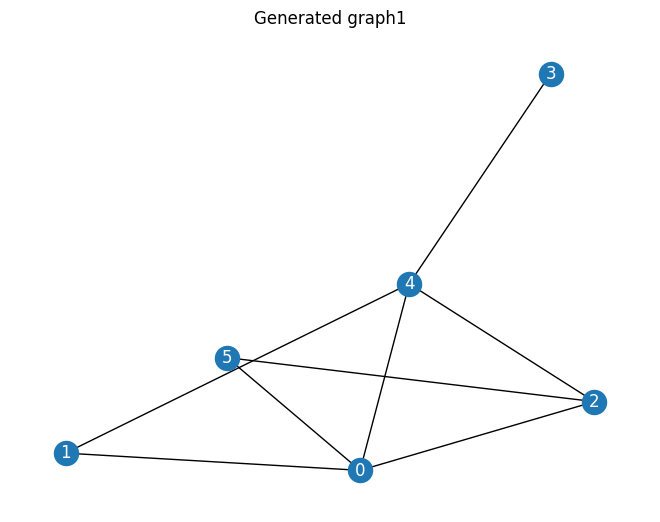

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 5: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}}


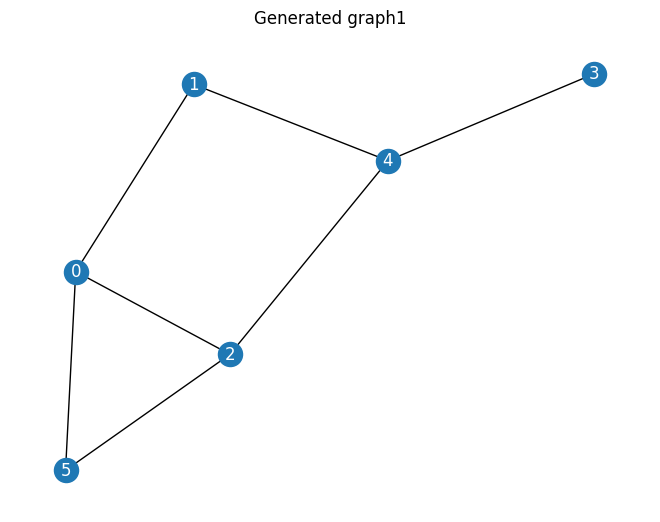

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [8, 21], 'nodes_coord': [[7.081439, 1.965, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [5, 6, 15, 11, 3, 5, 11, 24]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


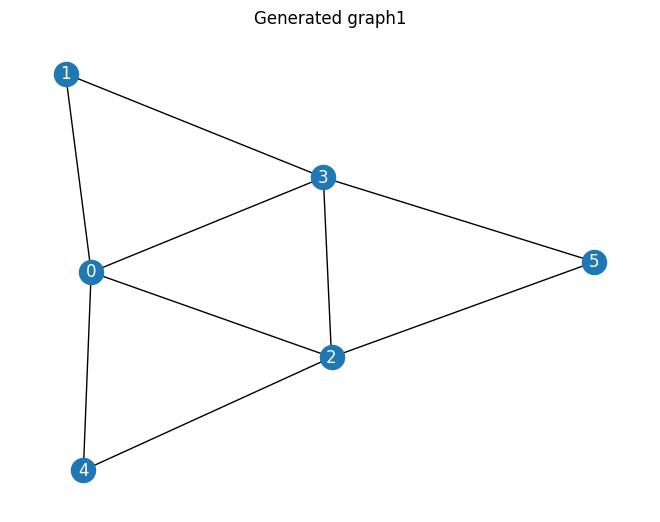

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 2: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 3: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


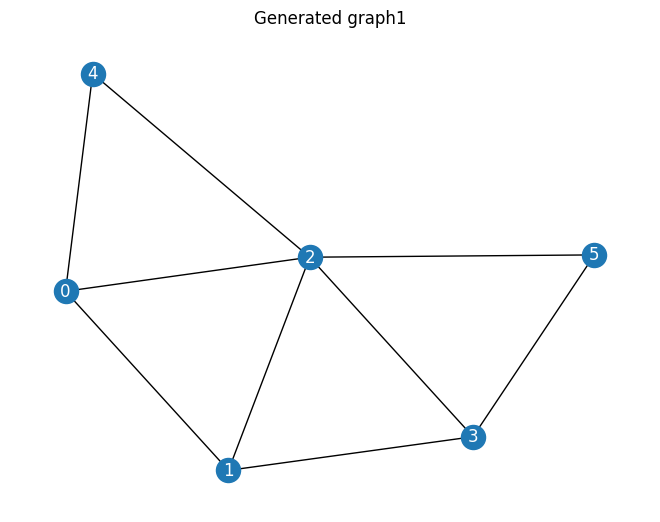

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 2: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 3: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


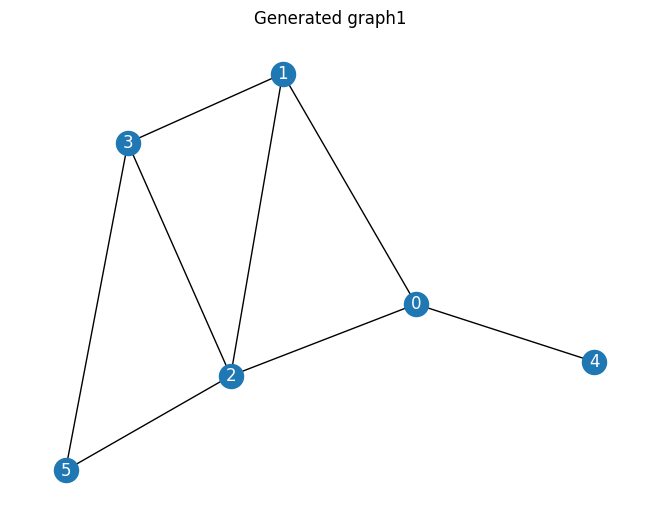

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 2: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 5: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}}


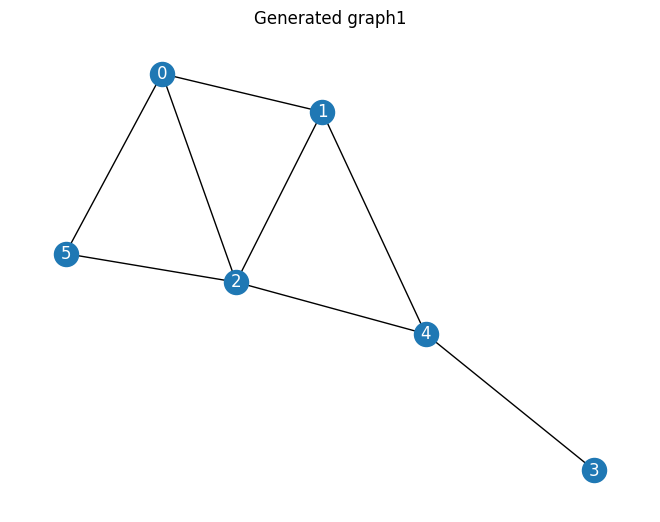

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 2: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 5: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}}


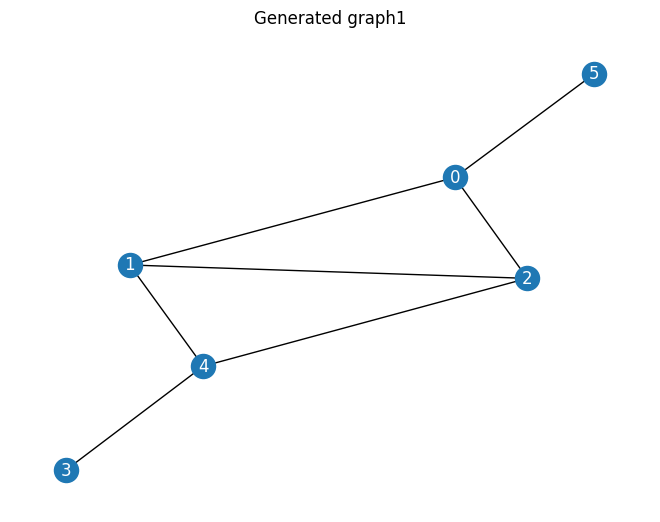

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 2: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 21], 'nodes_coord': [[7.081439, 1.965, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [5, 6, 15, 11, 3, 5, 11, 24]}, 5: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}}


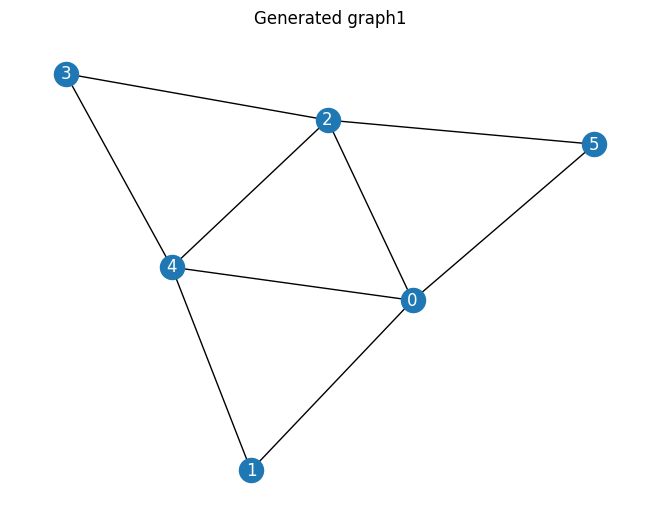

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 2: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 21], 'nodes_coord': [[7.081439, 1.965, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [5, 6, 15, 11, 3, 5, 11, 24]}, 5: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}}


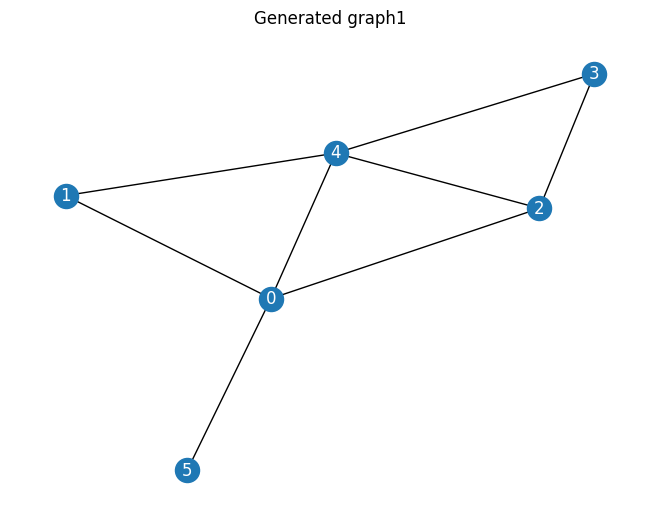

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


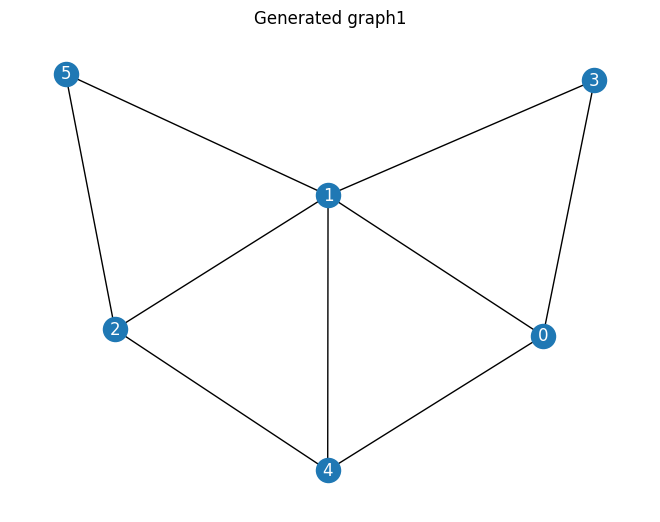

{0: {'nodes_combined': [0, 24], 'nodes_coord': [[12.452345, 0.5, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 11, 3, 5, 16, 20, 21]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}}


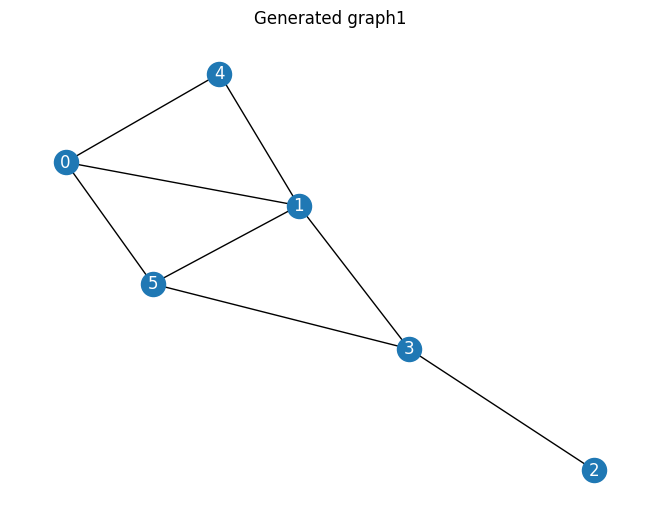

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


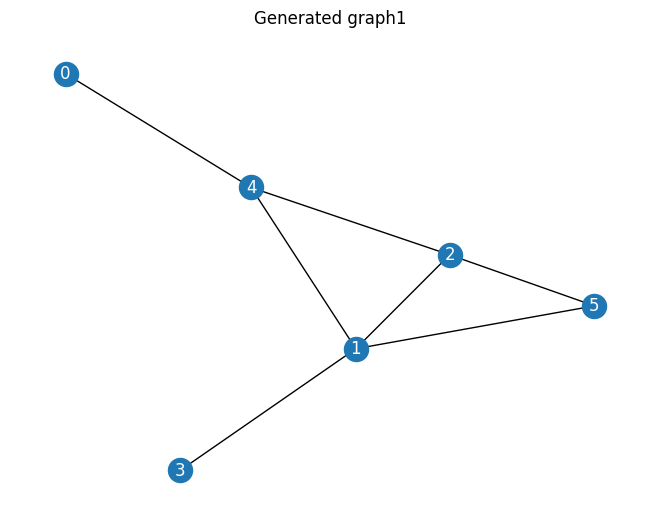

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [21, 24], 'nodes_coord': [[11.43466, 3.420715, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 5, 8, 11, 0, 3, 5, 16, 20]}}


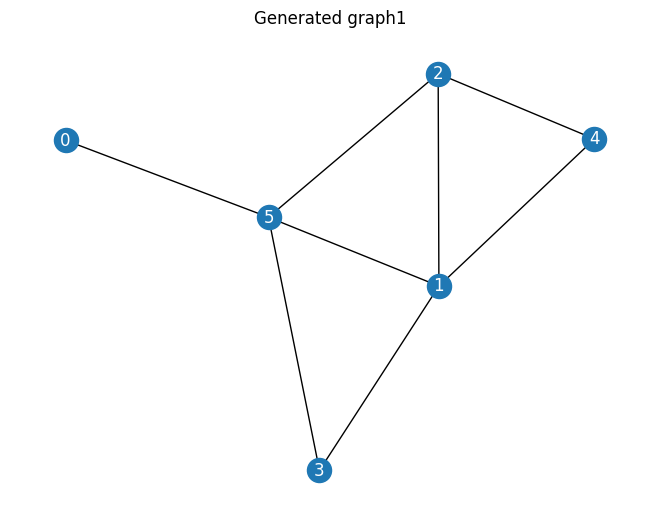

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


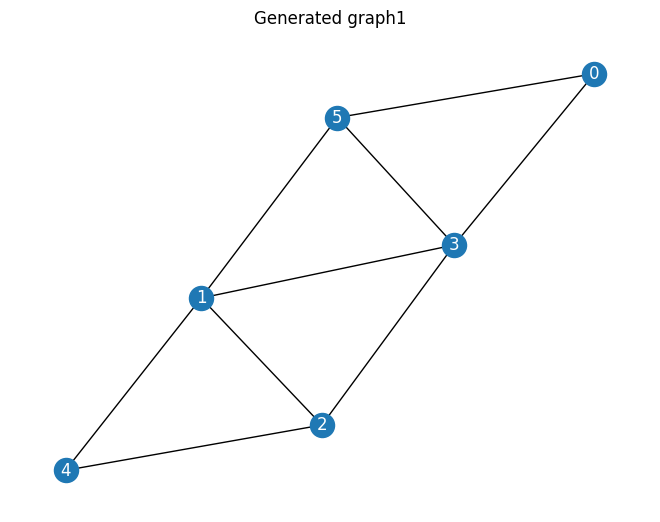

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}}


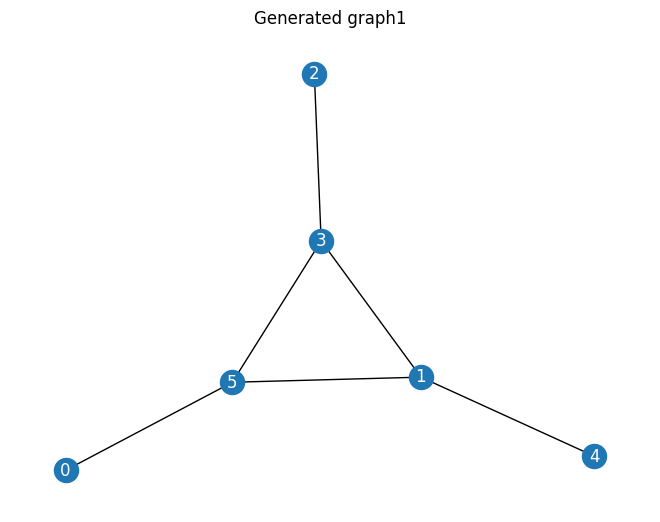

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [21, 24], 'nodes_coord': [[11.43466, 3.420715, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 5, 8, 11, 0, 3, 5, 16, 20]}}


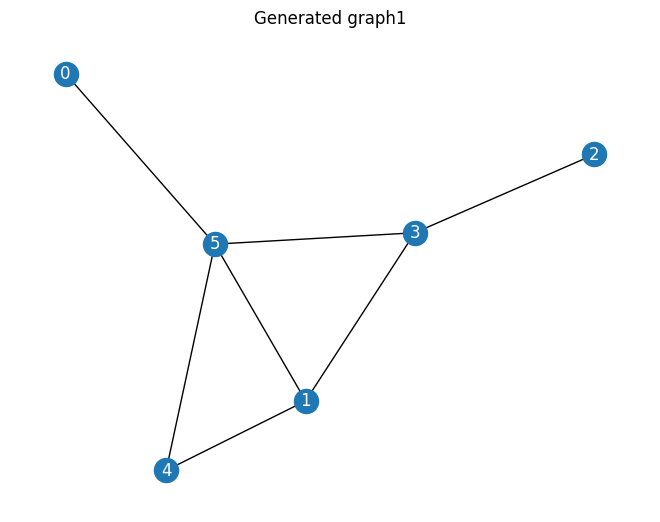

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


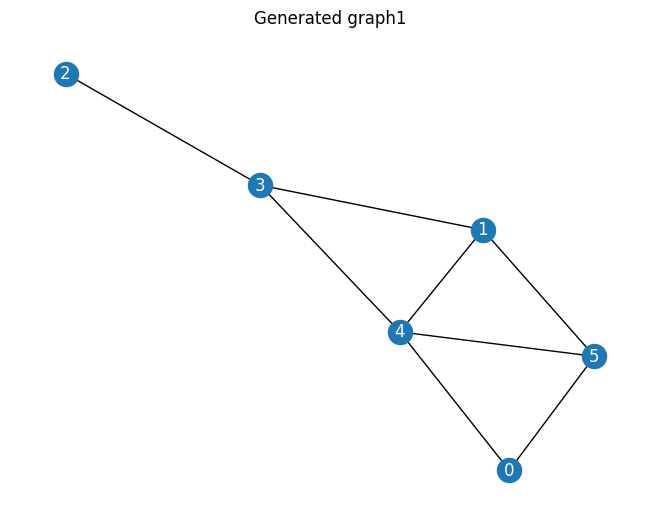

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [21, 24], 'nodes_coord': [[11.43466, 3.420715, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 5, 8, 11, 0, 3, 5, 16, 20]}}


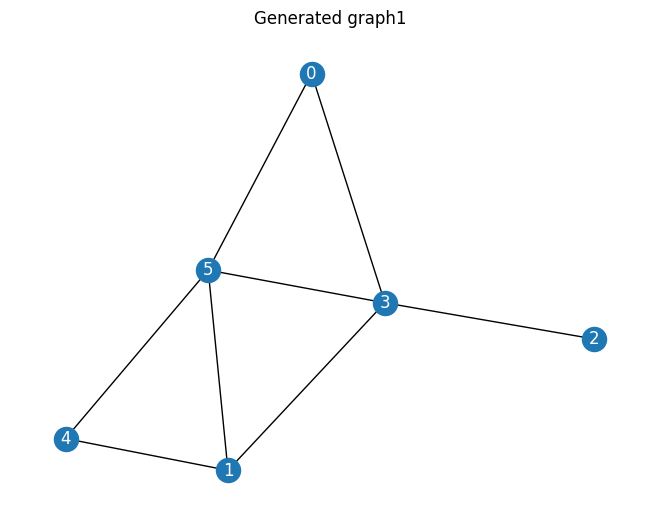

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [21, 24], 'nodes_coord': [[11.43466, 3.420715, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 5, 8, 11, 0, 3, 5, 16, 20]}}


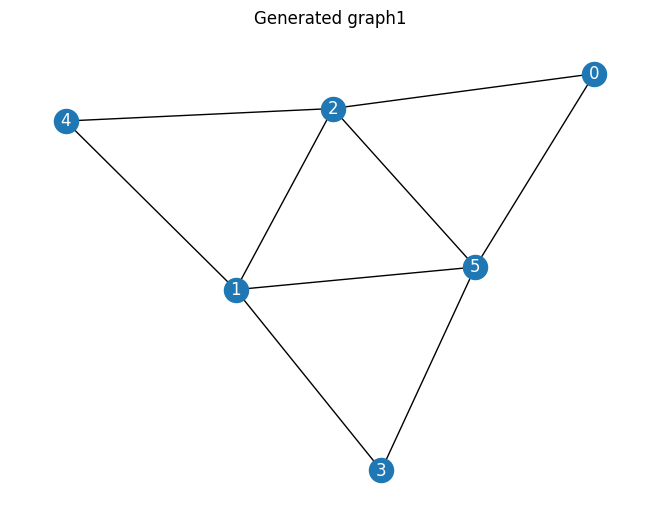

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 8], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 21, 15, 24, 6, 21, 15, 11]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 4: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


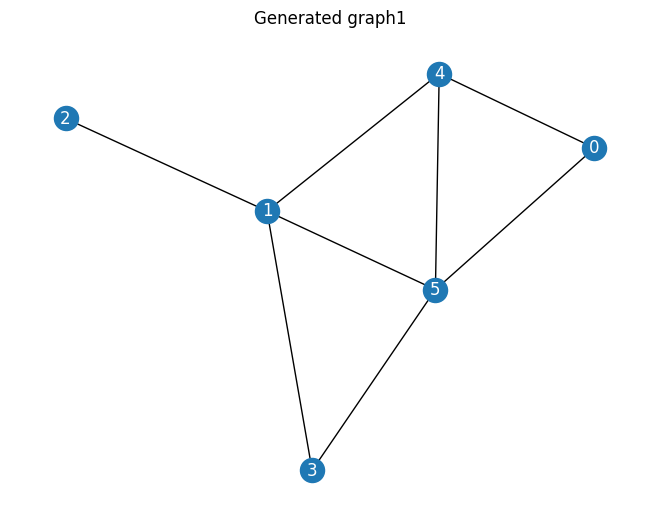

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 8], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 21, 15, 24, 6, 21, 15, 11]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


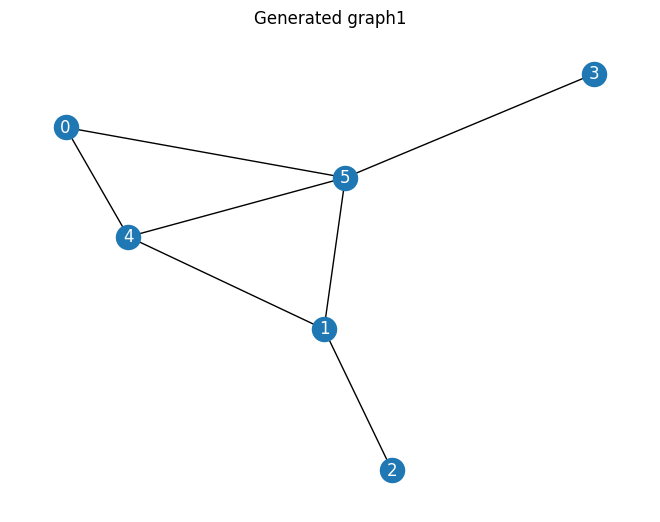

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 8], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 21, 15, 24, 6, 21, 15, 11]}, 2: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 3: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


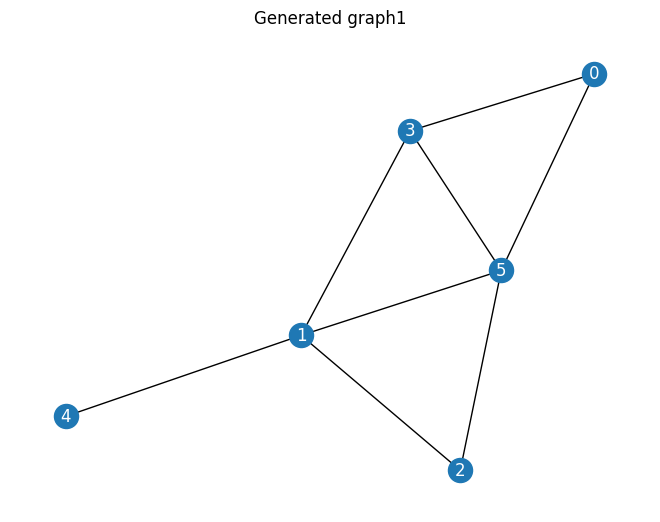

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 8], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 21, 15, 24, 6, 21, 15, 11]}, 2: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 3: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


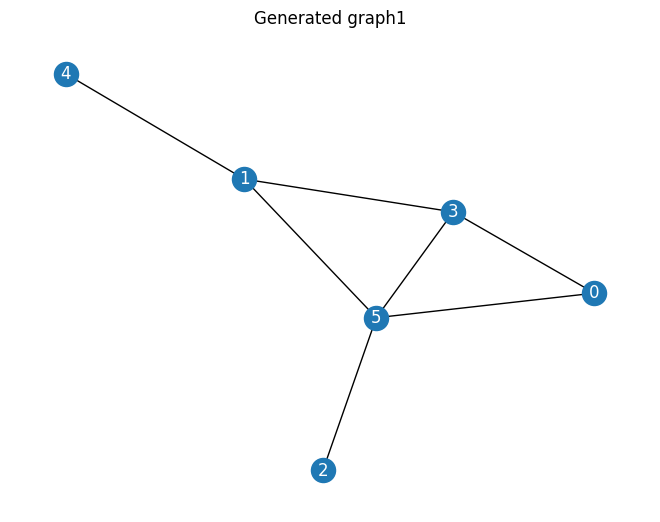

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


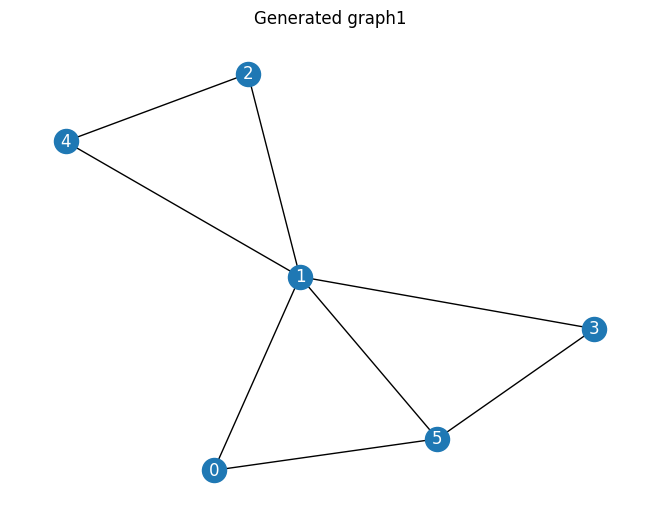

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


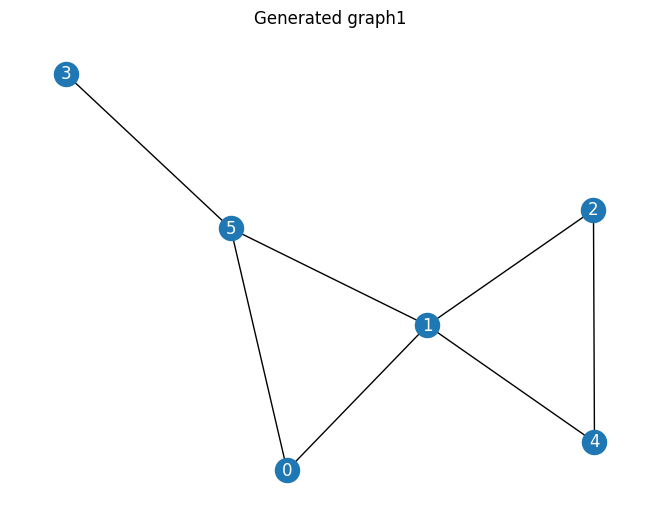

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


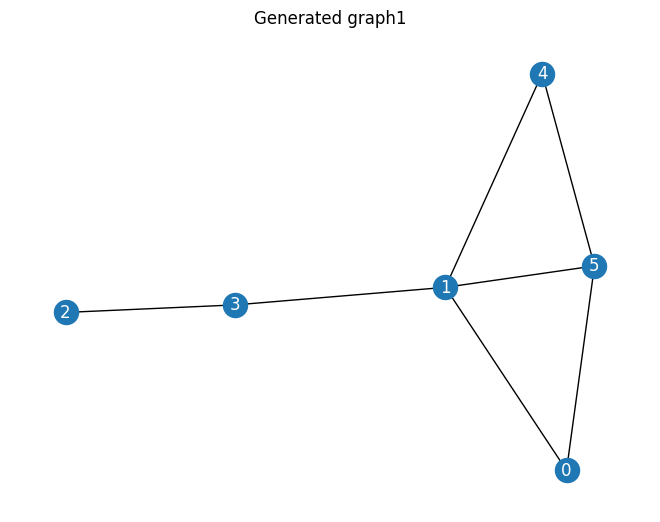

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


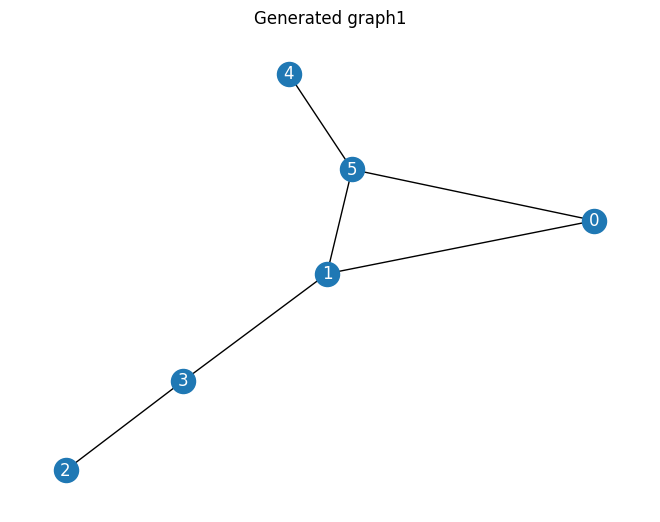

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


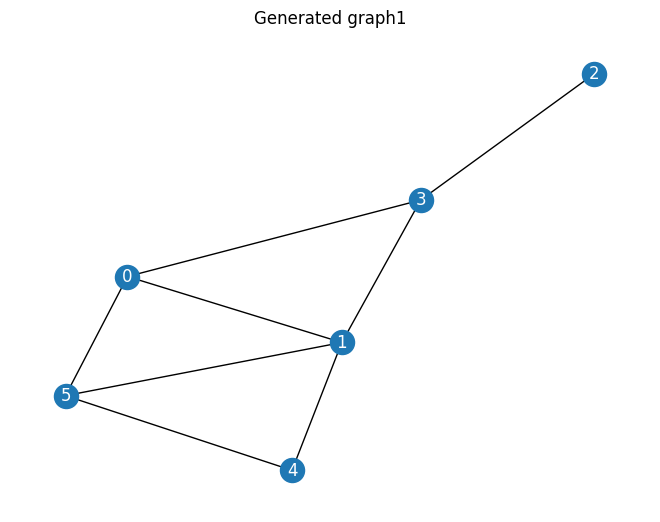

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


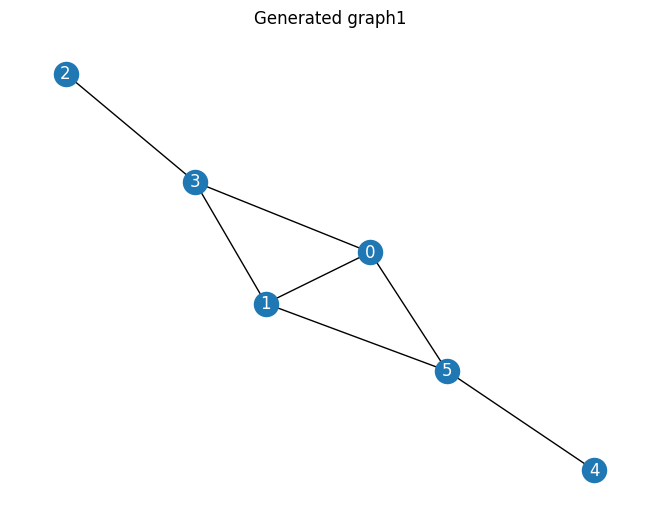

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 3: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


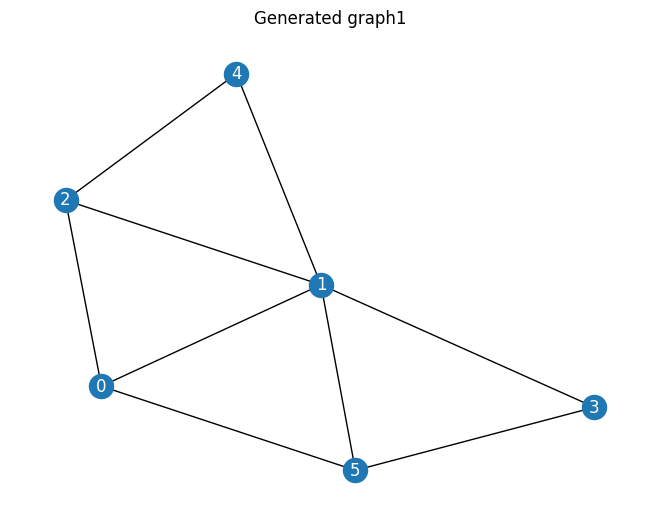

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


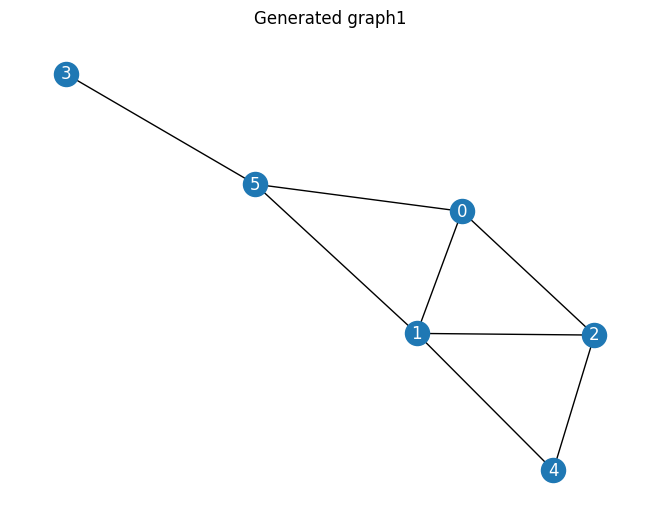

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 4: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


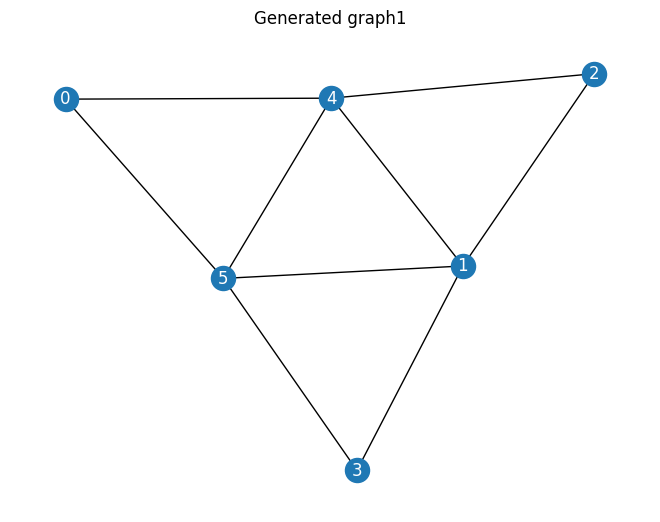

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


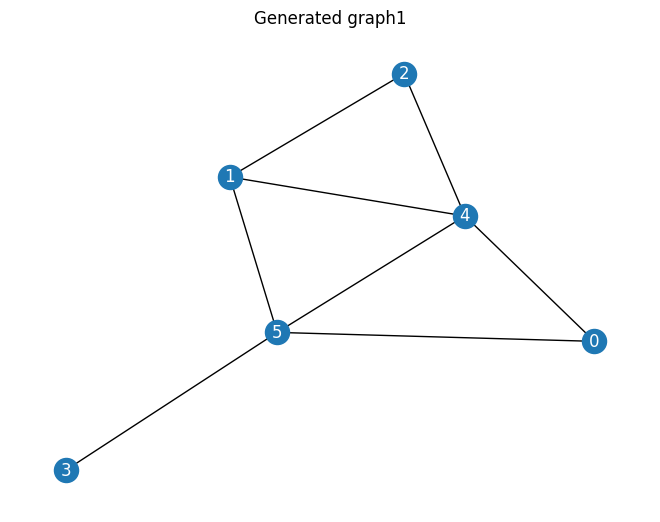

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 21], 'nodes_coord': [[7.081439, 1.965, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [5, 6, 15, 11, 3, 5, 11, 24]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


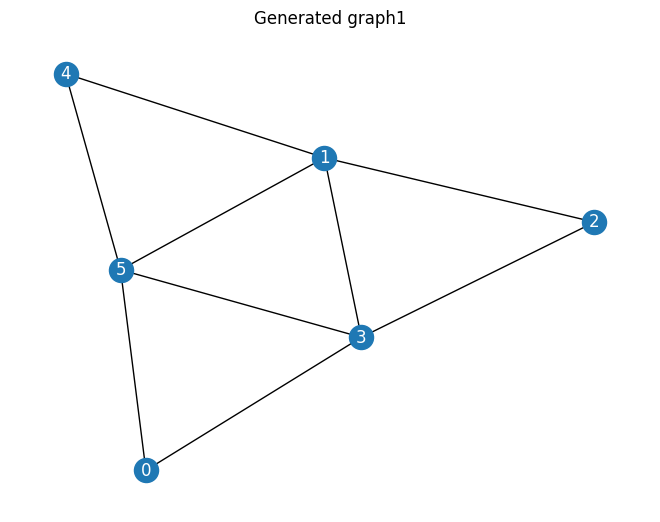

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 21], 'nodes_coord': [[7.081439, 1.965, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [5, 6, 15, 11, 3, 5, 11, 24]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


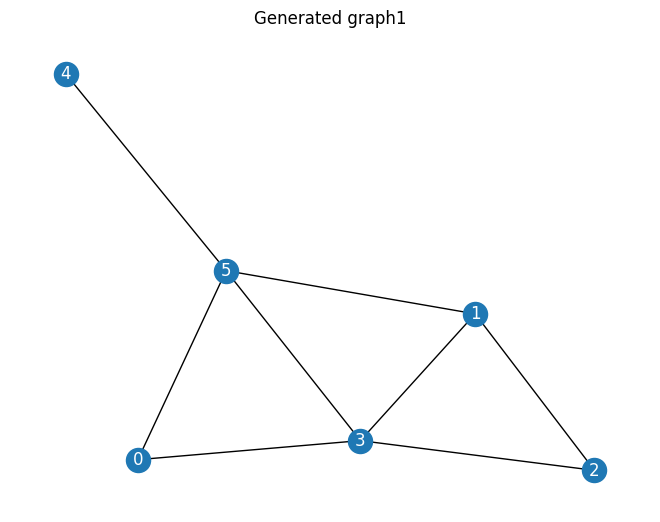

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


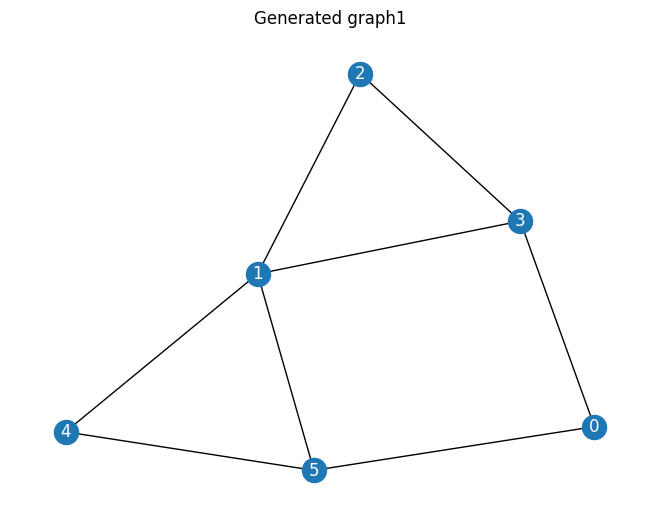

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [21, 24], 'nodes_coord': [[11.43466, 3.420715, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 5, 8, 11, 0, 3, 5, 16, 20]}}


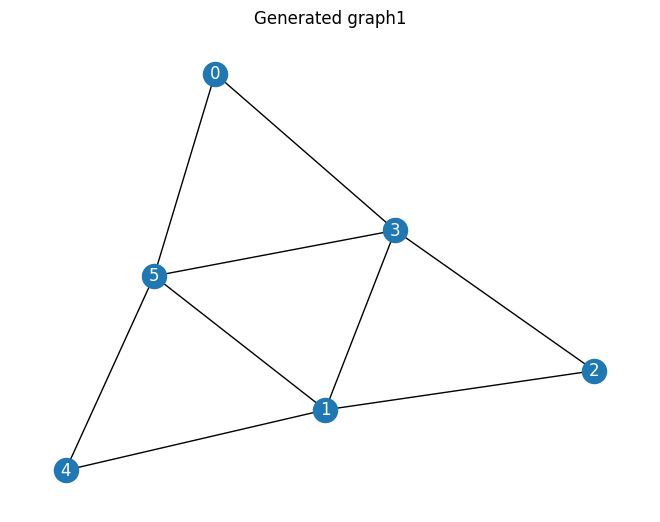

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


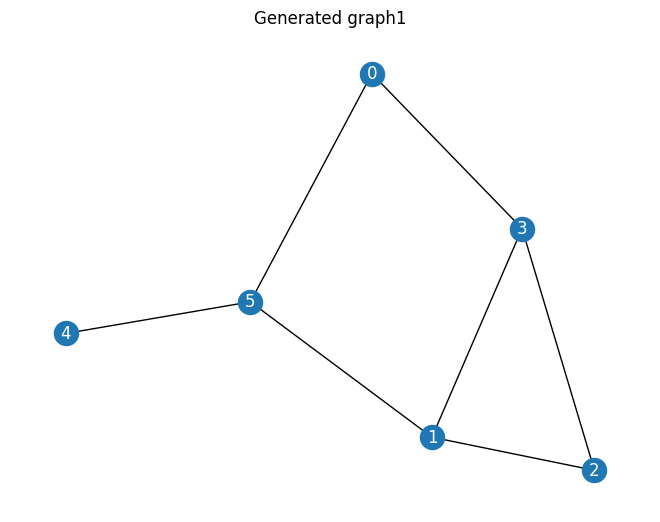

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [21, 24], 'nodes_coord': [[11.43466, 3.420715, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 5, 8, 11, 0, 3, 5, 16, 20]}}


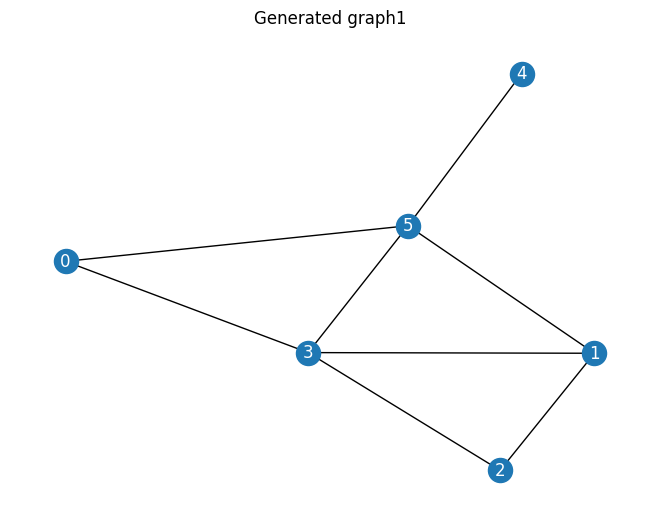

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 4: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


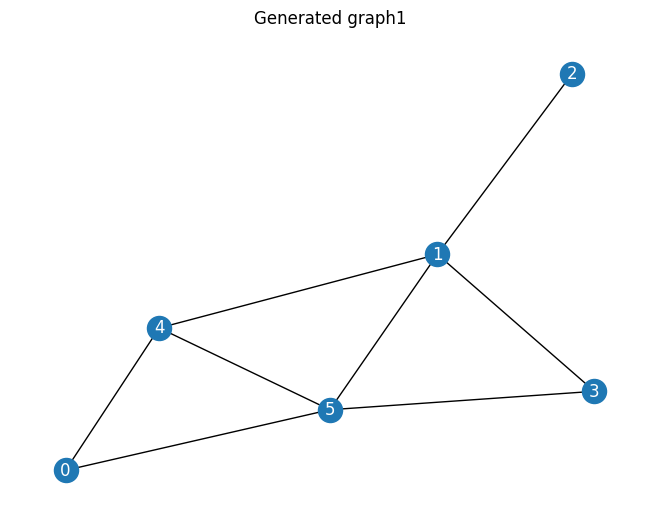

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


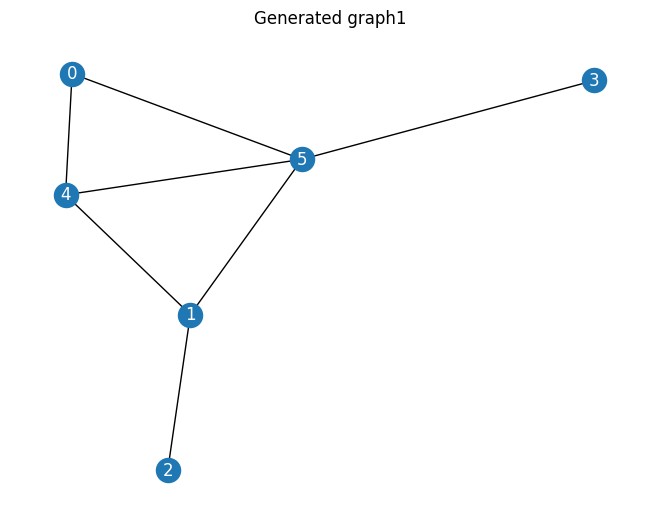

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 24], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 15, 0, 3, 16, 20, 21]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 4: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


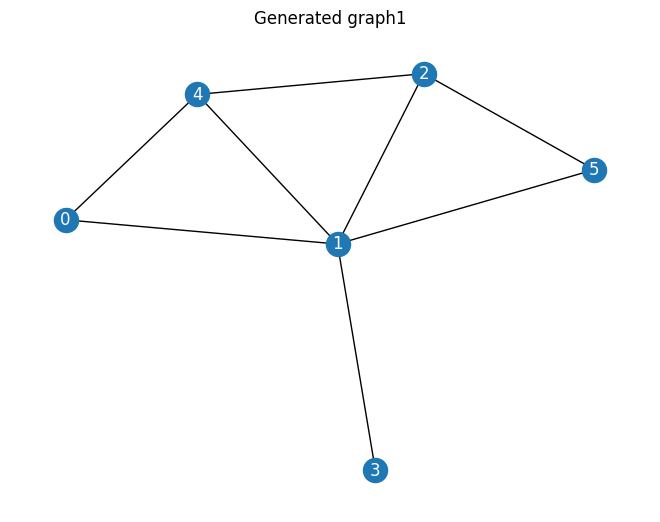

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 24], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 15, 0, 3, 16, 20, 21]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


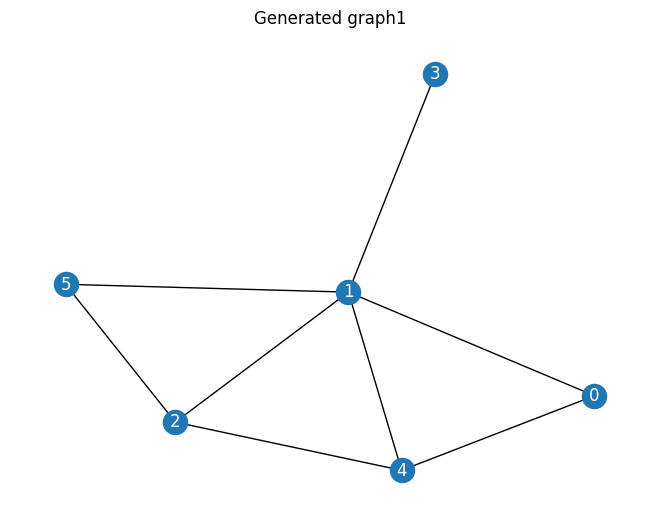

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 24], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 15, 0, 3, 16, 20, 21]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}}


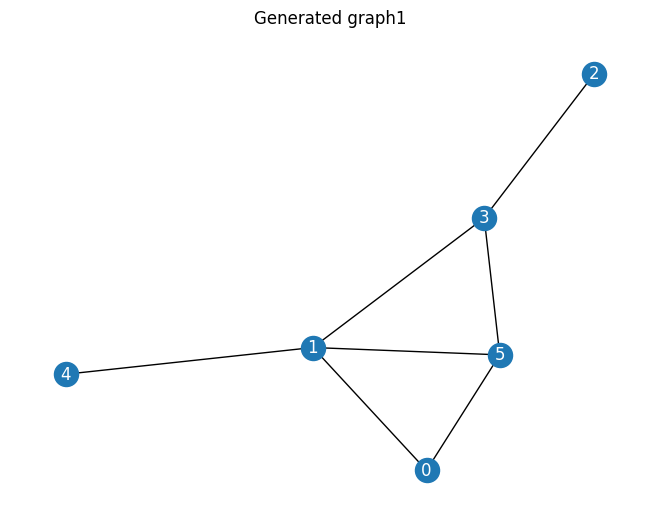

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [5, 24], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 15, 0, 3, 16, 20, 21]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}}


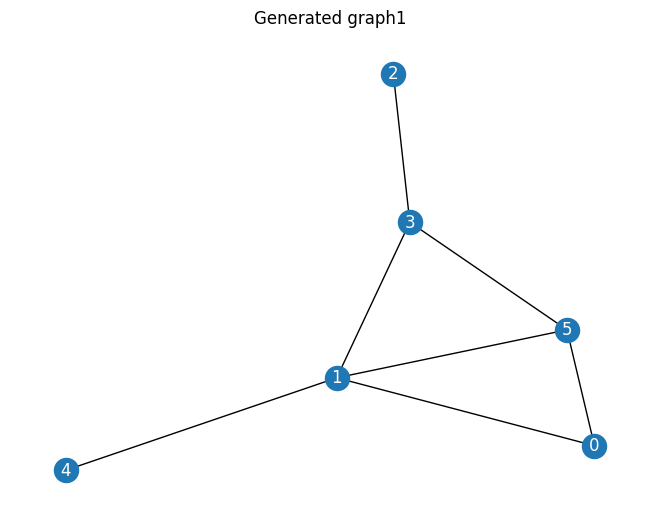

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 2: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 3: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


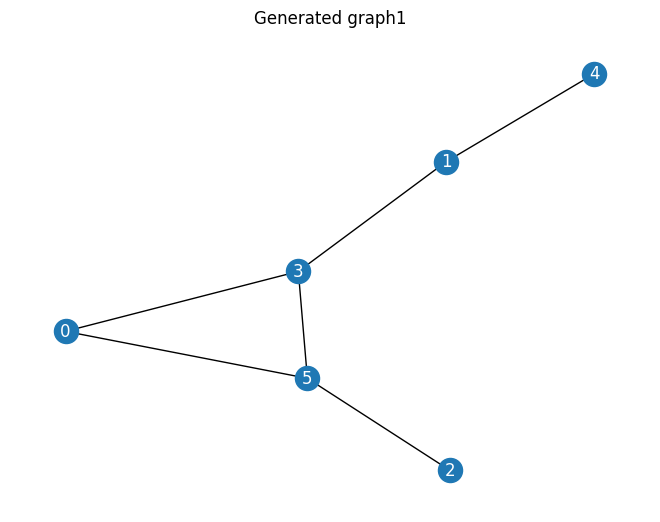

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 2: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 3: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


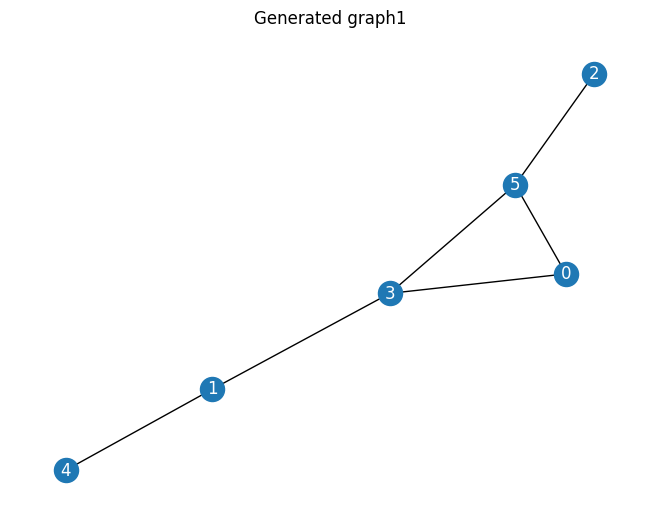

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 2: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 3: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 4: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


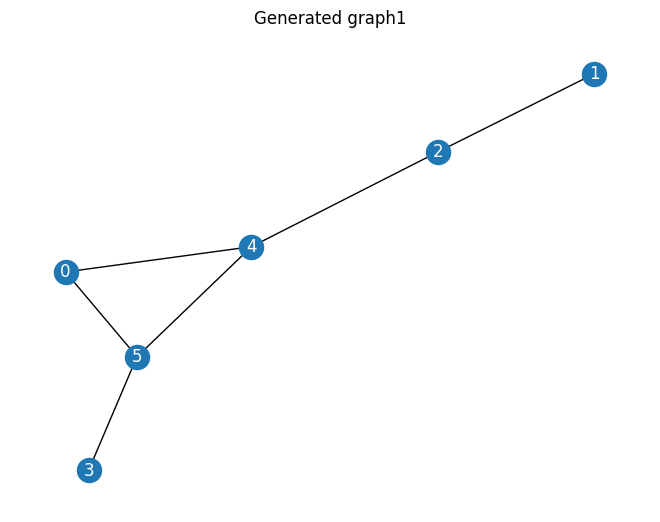

{0: {'nodes_combined': [0, 3], 'nodes_coord': [[12.452345, 0.5, 10.0], [12.452433, 1.987838, 10.0]], 'adjacent_nodes': [24, 11, 21, 24, 11]}, 1: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 2: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


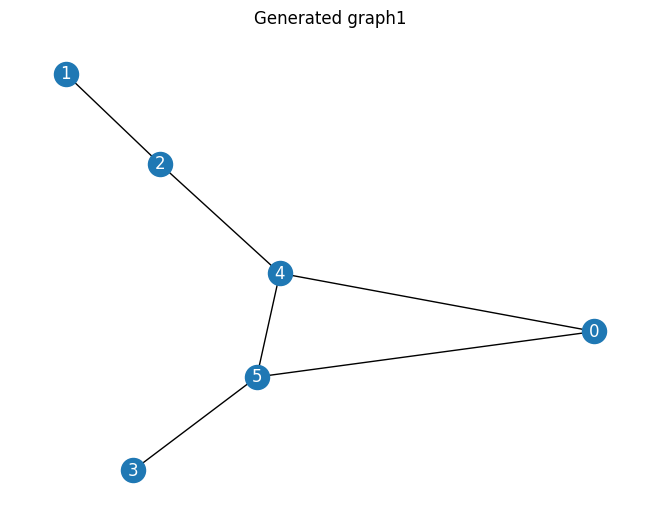

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


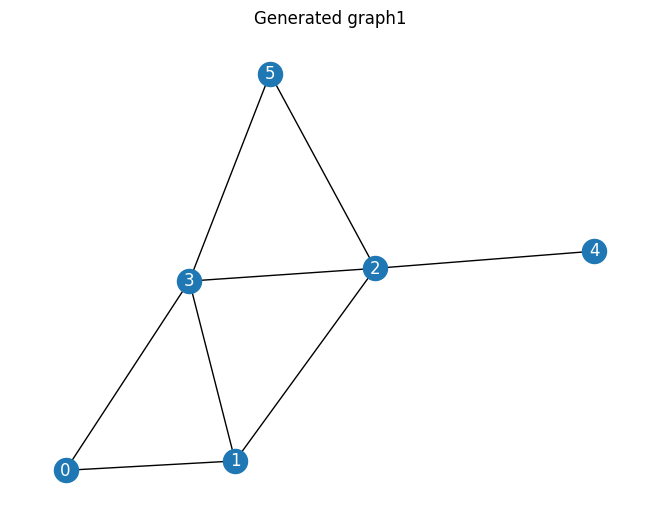

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


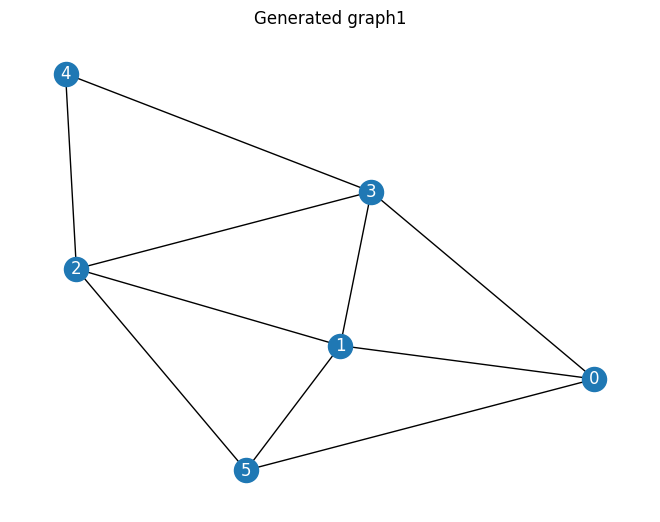

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 5: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}}


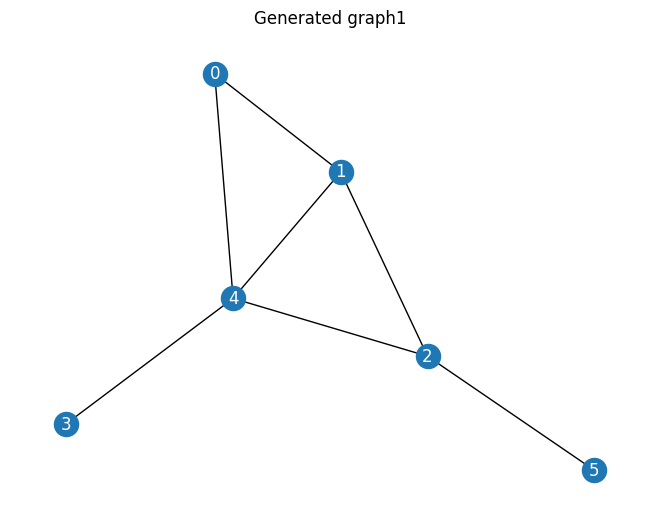

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


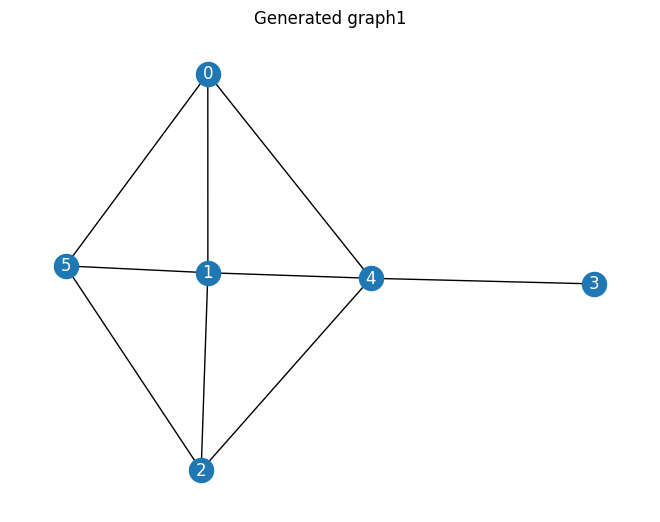

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 8], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 21, 15, 24, 6, 21, 15, 11]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


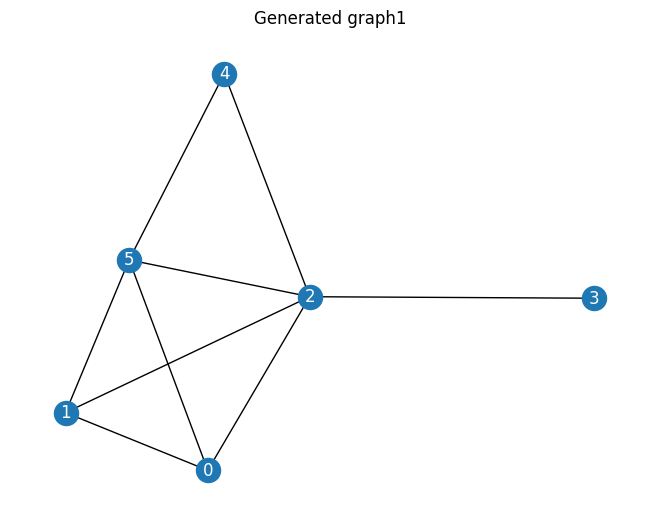

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 8], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 21, 15, 24, 6, 21, 15, 11]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


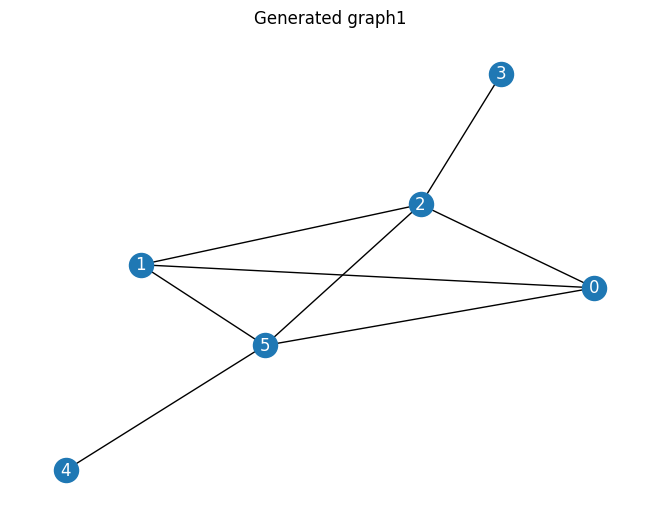

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 8], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 21, 15, 24, 6, 21, 15, 11]}, 3: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


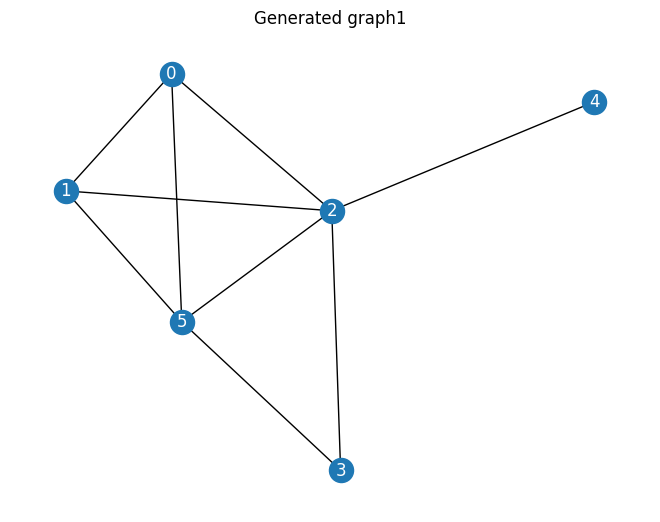

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 8], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 21, 15, 24, 6, 21, 15, 11]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


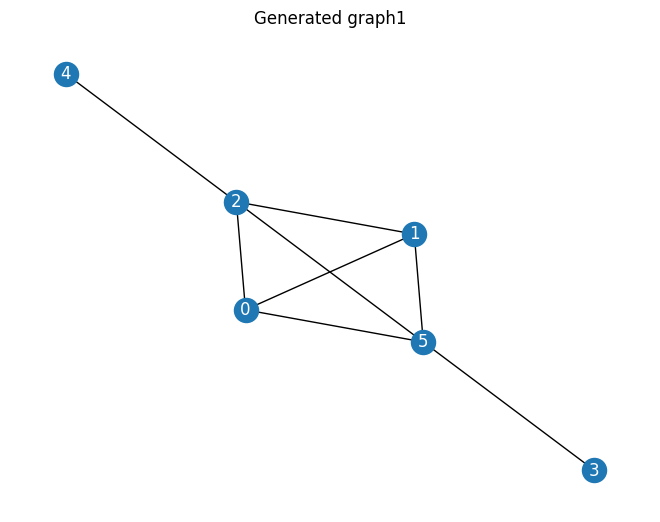

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 3: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


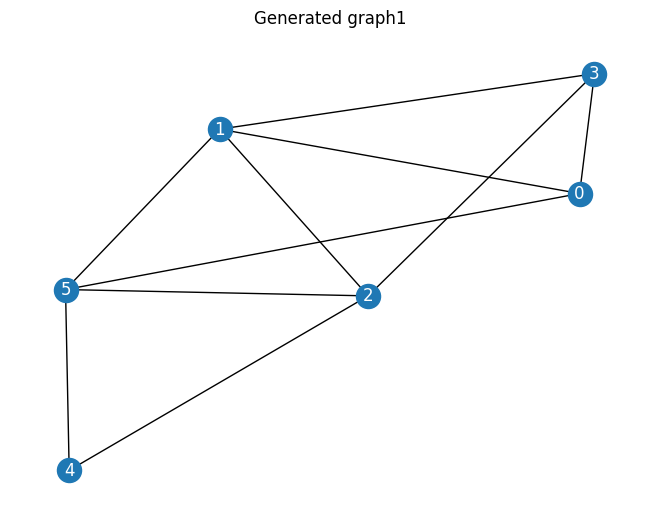

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 3: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


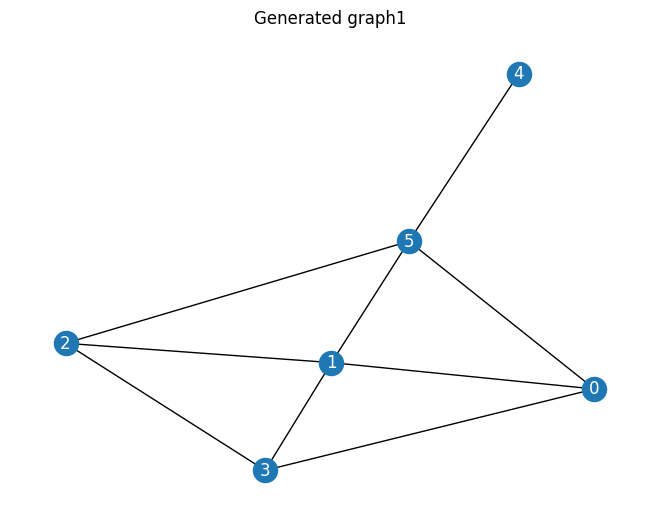

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


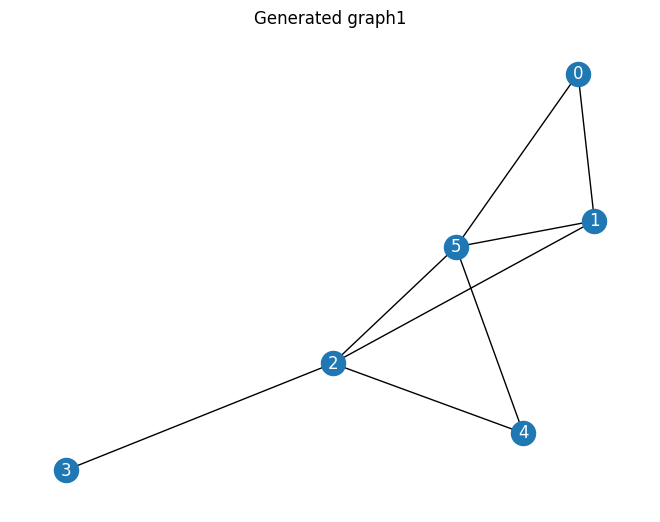

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


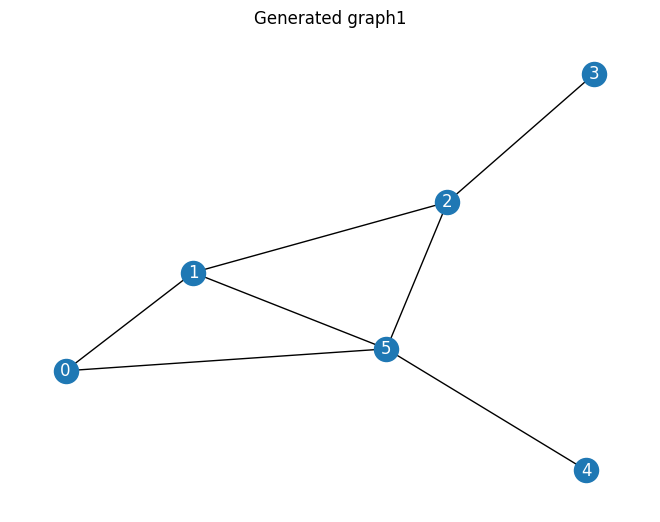

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 24], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 15, 0, 3, 16, 20, 21]}, 3: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


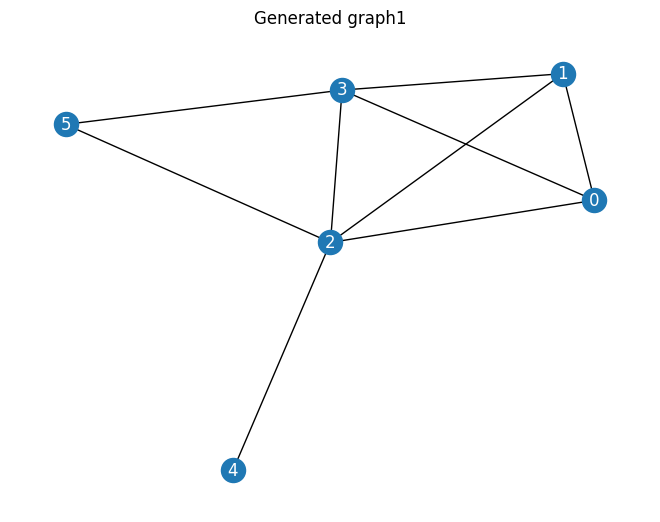

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 24], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 15, 0, 3, 16, 20, 21]}, 3: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


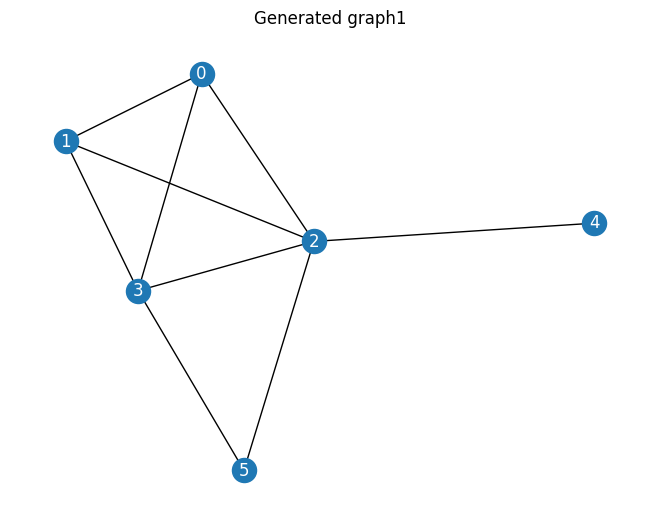

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 24], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 15, 0, 3, 16, 20, 21]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 5: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}}


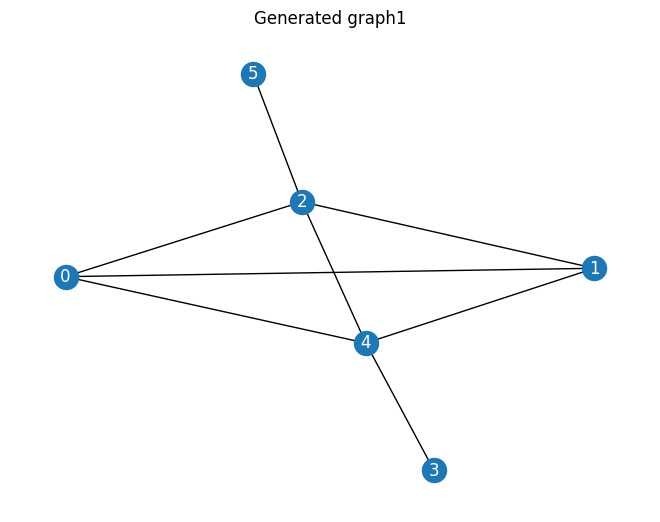

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [5, 24], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 15, 0, 3, 16, 20, 21]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 5: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}}


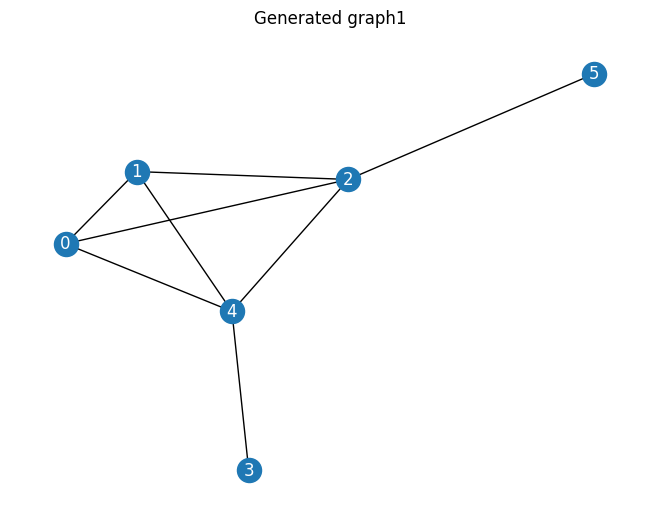

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


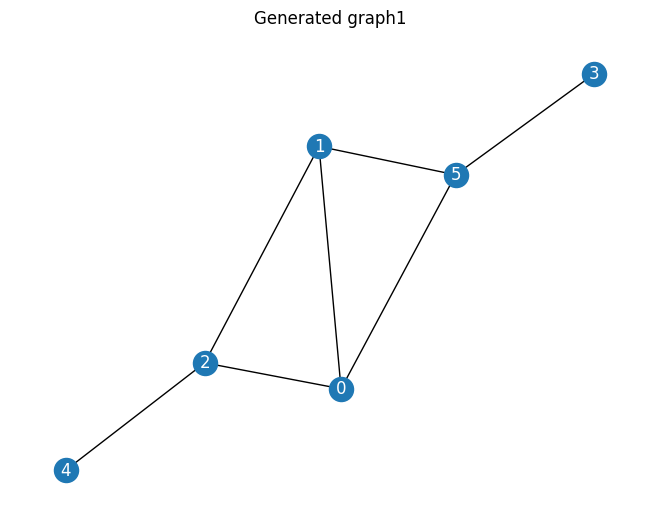

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


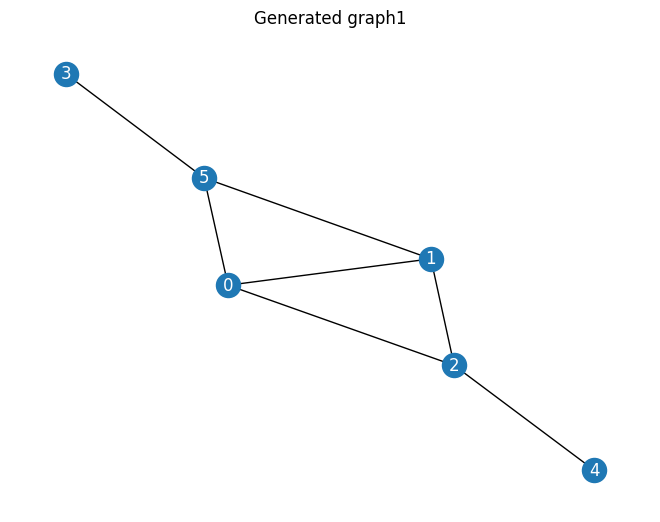

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


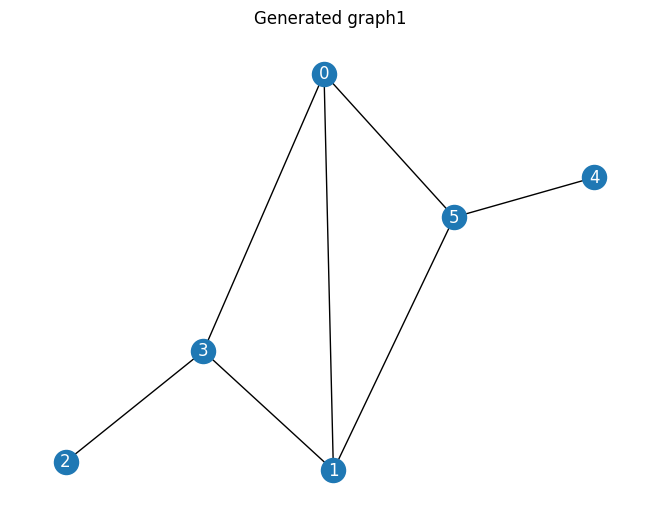

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


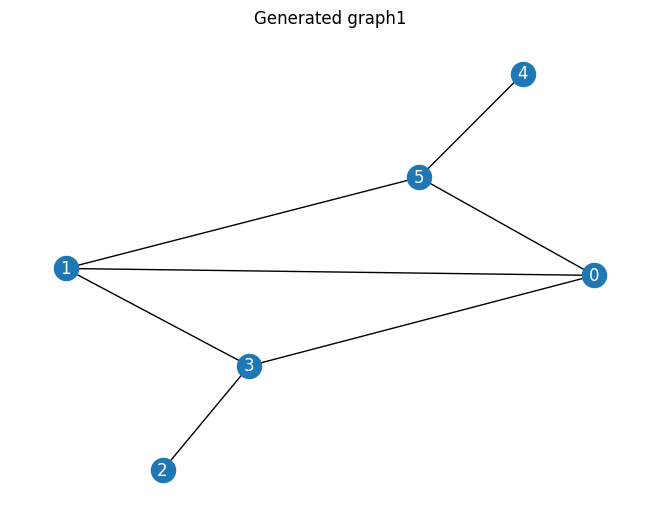

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 24], 'nodes_coord': [[12.452433, 1.987838, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [0, 21, 11, 0, 5, 16, 20, 21]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


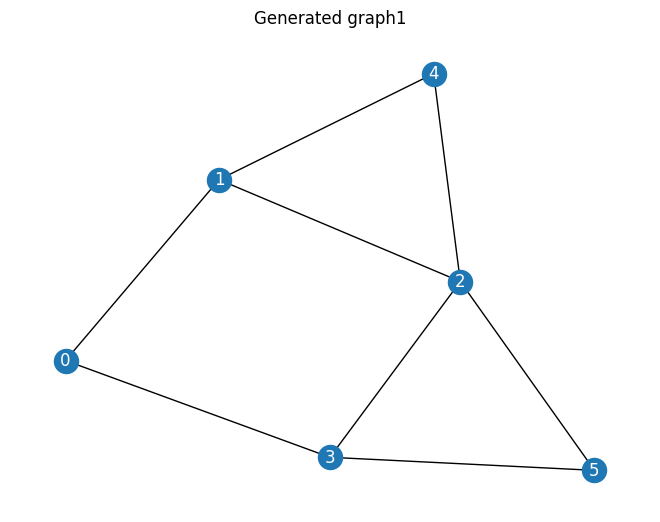

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 24], 'nodes_coord': [[12.452433, 1.987838, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [0, 21, 11, 0, 5, 16, 20, 21]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 21], 'nodes_coord': [[7.081439, 1.965, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [5, 6, 15, 11, 3, 5, 11, 24]}, 5: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}}


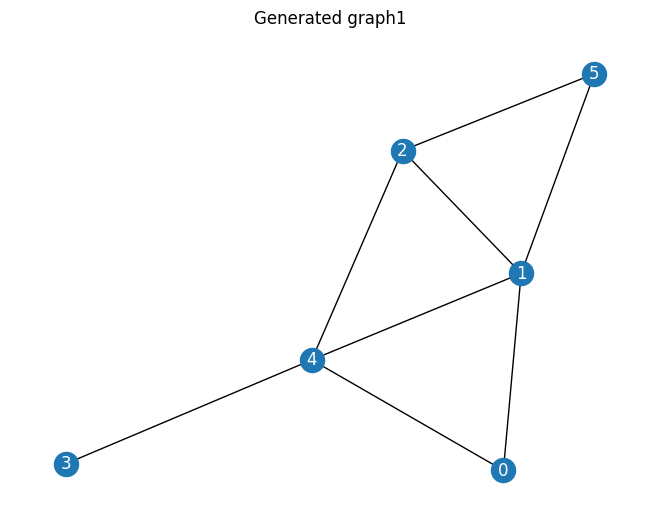

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 24], 'nodes_coord': [[12.452433, 1.987838, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [0, 21, 11, 0, 5, 16, 20, 21]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 5: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}}


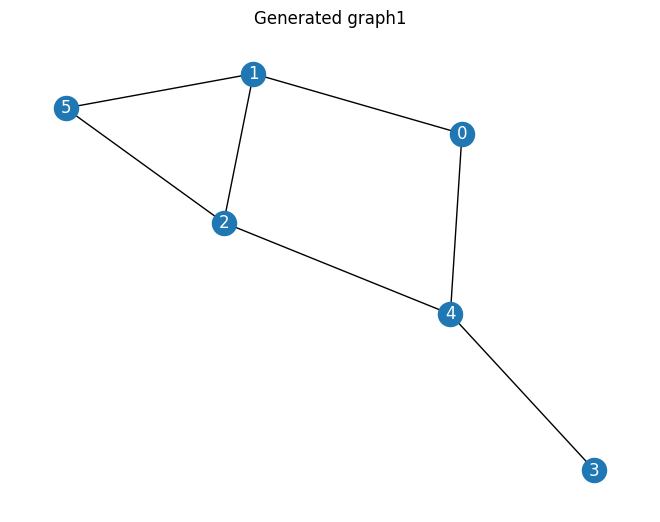

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 24], 'nodes_coord': [[12.452433, 1.987838, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [0, 21, 11, 0, 5, 16, 20, 21]}, 2: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 3: {'nodes_combined': [8, 21], 'nodes_coord': [[7.081439, 1.965, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [5, 6, 15, 11, 3, 5, 11, 24]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


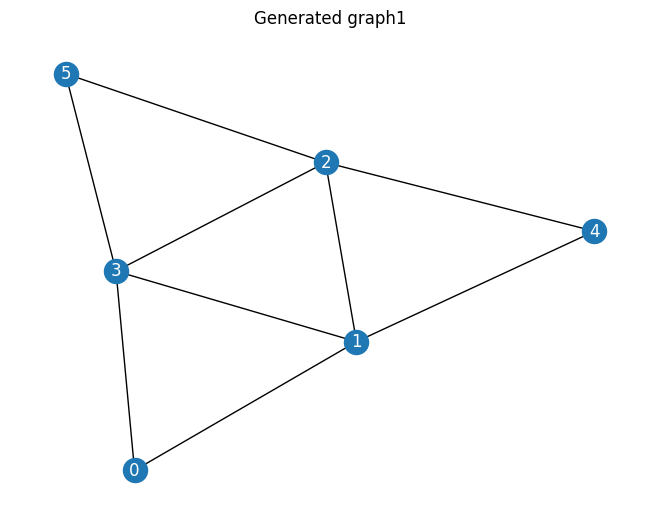

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 24], 'nodes_coord': [[12.452433, 1.987838, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [0, 21, 11, 0, 5, 16, 20, 21]}, 2: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 3: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


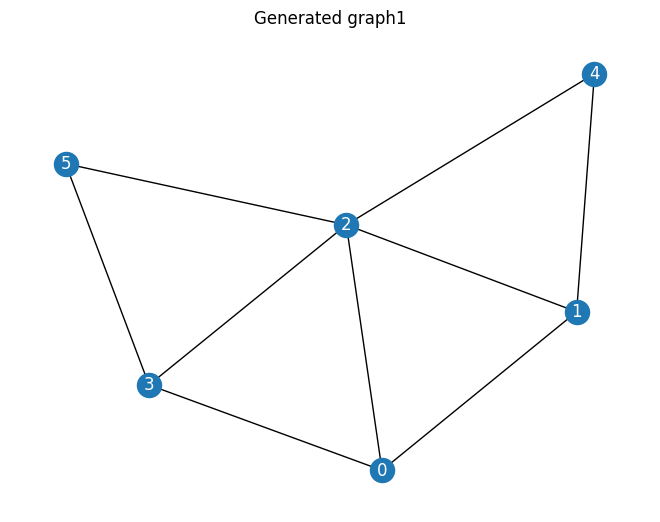

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 24], 'nodes_coord': [[12.452433, 1.987838, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [0, 21, 11, 0, 5, 16, 20, 21]}, 2: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 3: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


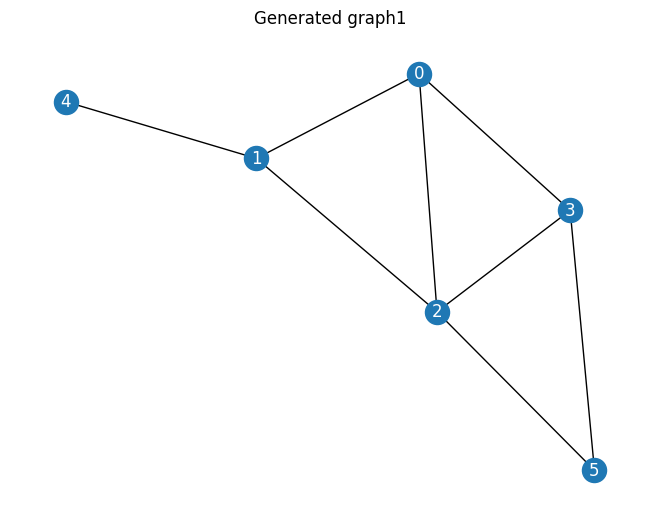

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 24], 'nodes_coord': [[12.452433, 1.987838, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [0, 21, 11, 0, 5, 16, 20, 21]}, 2: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 5: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}}


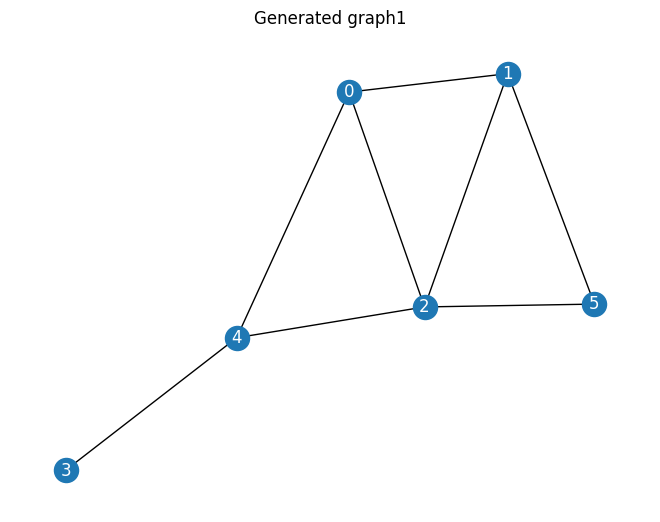

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 24], 'nodes_coord': [[12.452433, 1.987838, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [0, 21, 11, 0, 5, 16, 20, 21]}, 2: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 5: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}}


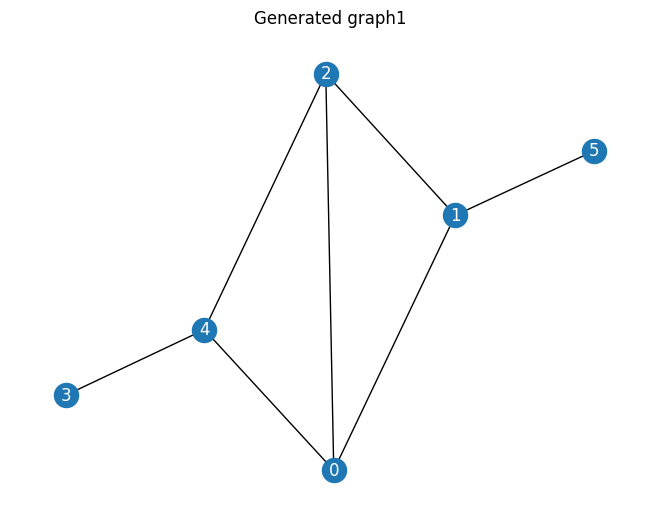

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 24], 'nodes_coord': [[12.452433, 1.987838, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [0, 21, 11, 0, 5, 16, 20, 21]}, 2: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 21], 'nodes_coord': [[7.081439, 1.965, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [5, 6, 15, 11, 3, 5, 11, 24]}, 5: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}}


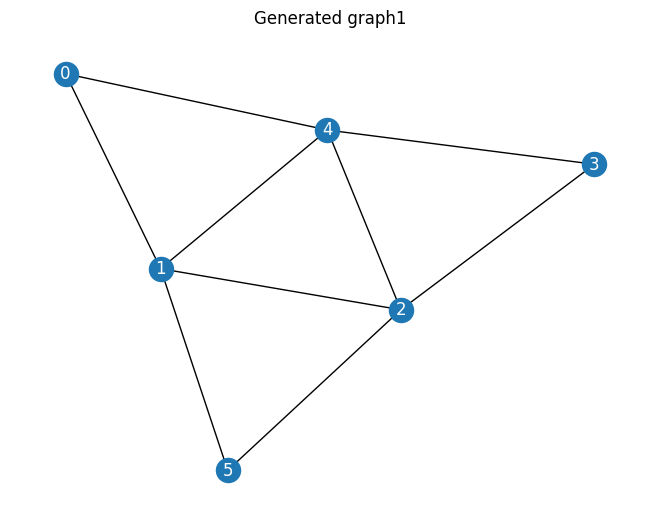

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [3, 24], 'nodes_coord': [[12.452433, 1.987838, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [0, 21, 11, 0, 5, 16, 20, 21]}, 2: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 3: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 4: {'nodes_combined': [8, 21], 'nodes_coord': [[7.081439, 1.965, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [5, 6, 15, 11, 3, 5, 11, 24]}, 5: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}}


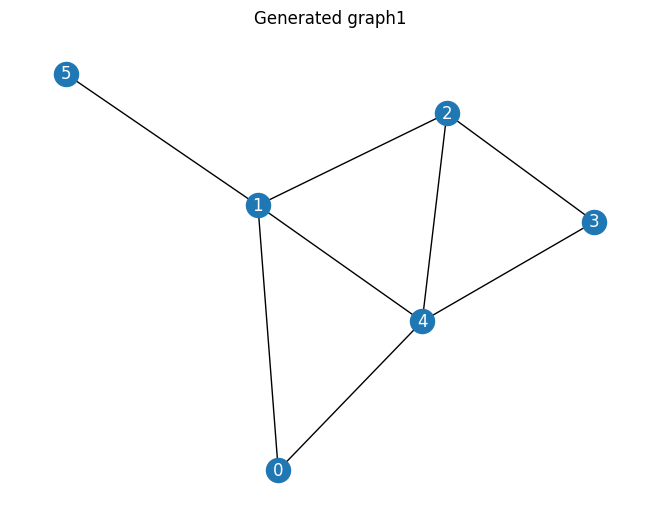

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [21, 24], 'nodes_coord': [[11.43466, 3.420715, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 5, 8, 11, 0, 3, 5, 16, 20]}}


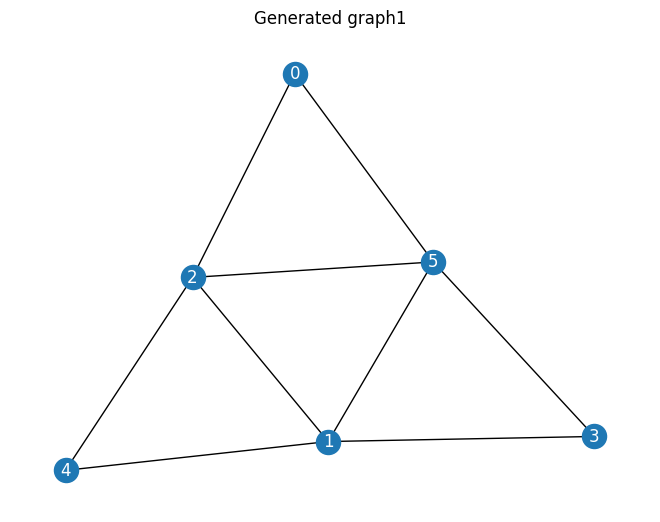

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [21, 24], 'nodes_coord': [[11.43466, 3.420715, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 5, 8, 11, 0, 3, 5, 16, 20]}}


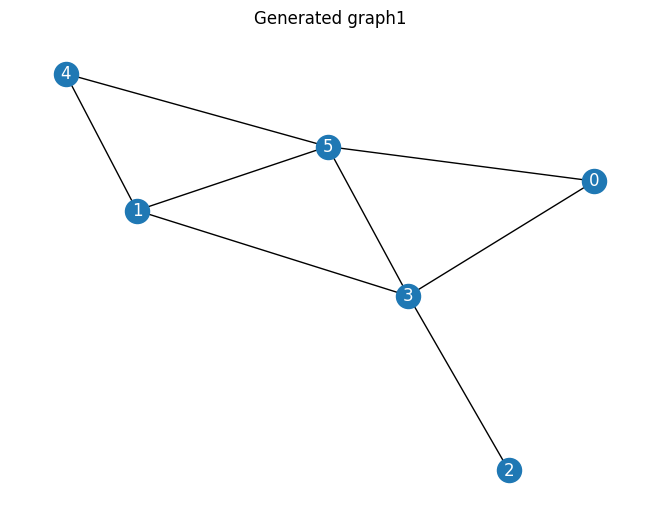

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


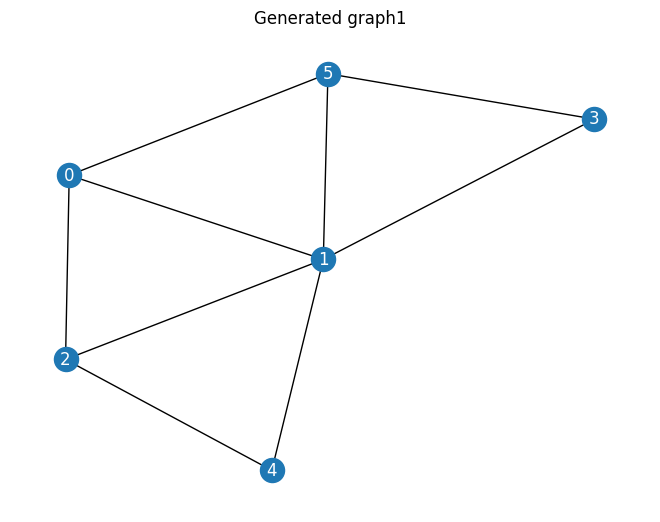

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


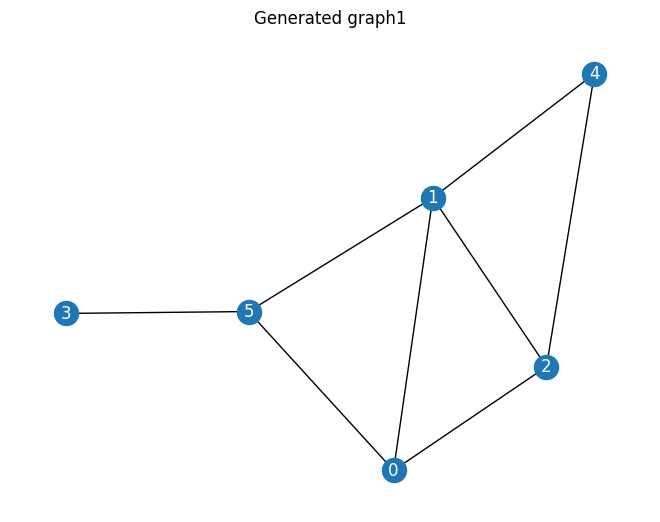

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


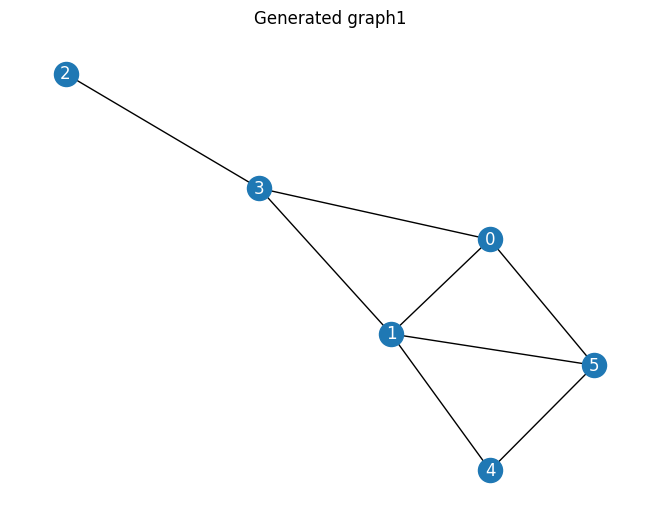

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


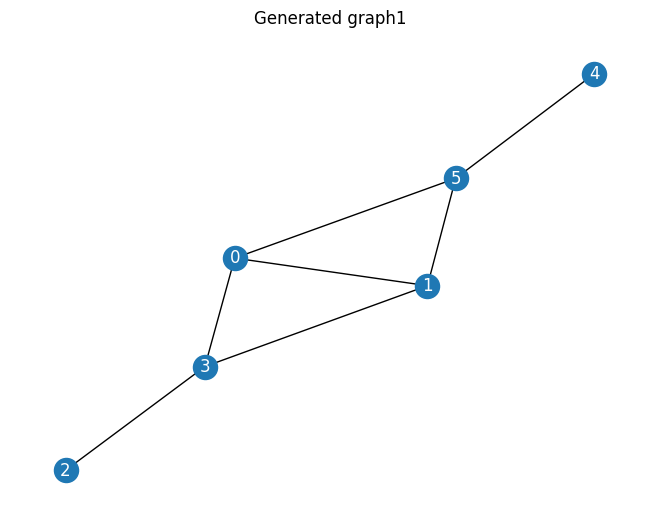

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 21], 'nodes_coord': [[7.081439, 1.965, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [5, 6, 15, 11, 3, 5, 11, 24]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


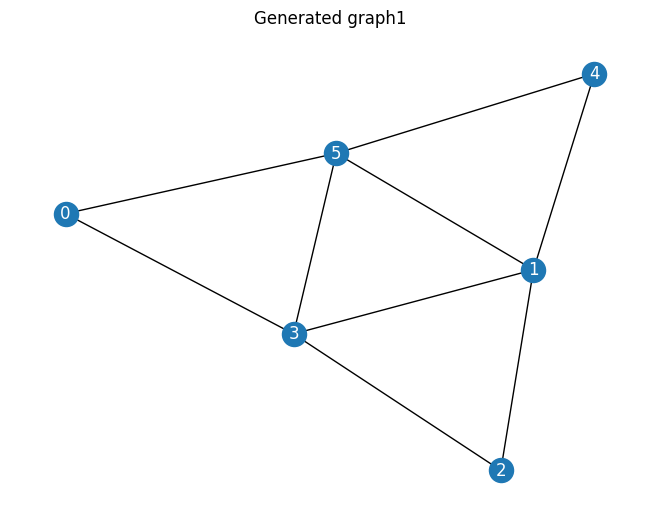

{0: {'nodes_combined': [0, 11], 'nodes_coord': [[12.452345, 0.5, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [24, 3, 3, 8, 21]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 21], 'nodes_coord': [[7.081439, 1.965, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [5, 6, 15, 11, 3, 5, 11, 24]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


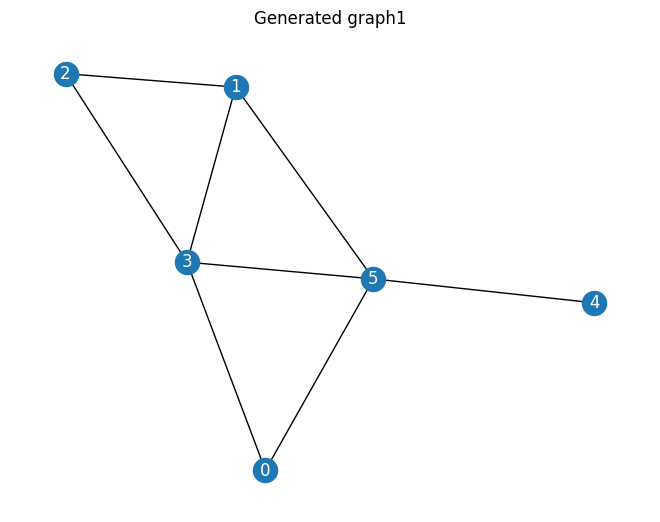

{0: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


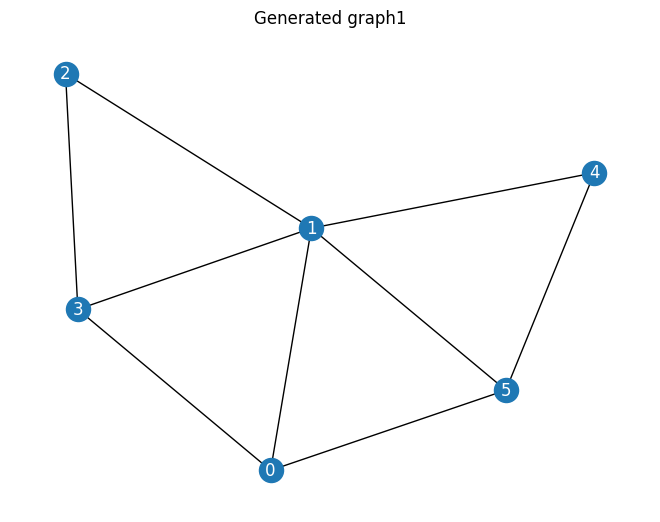

{0: {'nodes_combined': [3, 21], 'nodes_coord': [[12.452433, 1.987838, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 24, 11, 5, 8, 11, 24]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 11], 'nodes_coord': [[7.081439, 1.965, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [5, 6, 21, 15, 0, 3, 21]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


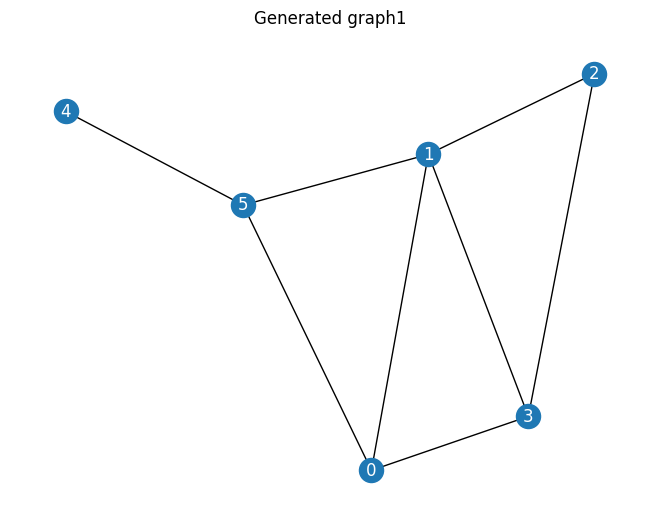

{0: {'nodes_combined': [3, 24], 'nodes_coord': [[12.452433, 1.987838, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [0, 21, 11, 0, 5, 16, 20, 21]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}, 5: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}}


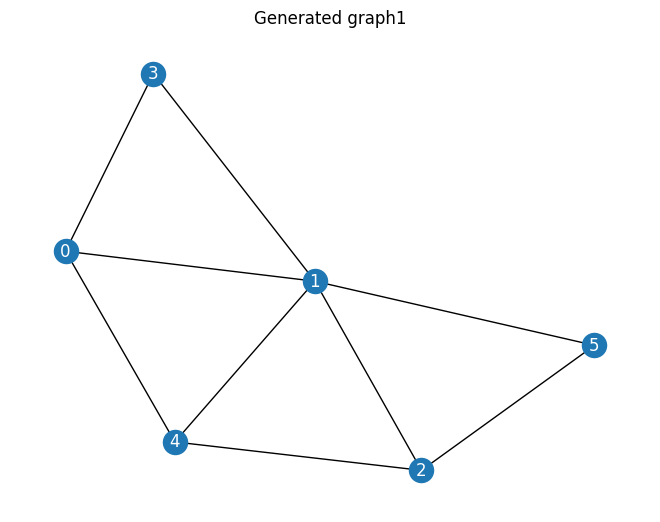

{0: {'nodes_combined': [3, 24], 'nodes_coord': [[12.452433, 1.987838, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [0, 21, 11, 0, 5, 16, 20, 21]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [11, 21], 'nodes_coord': [[9.925599, 1.487905, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [0, 3, 8, 3, 5, 8, 24]}}


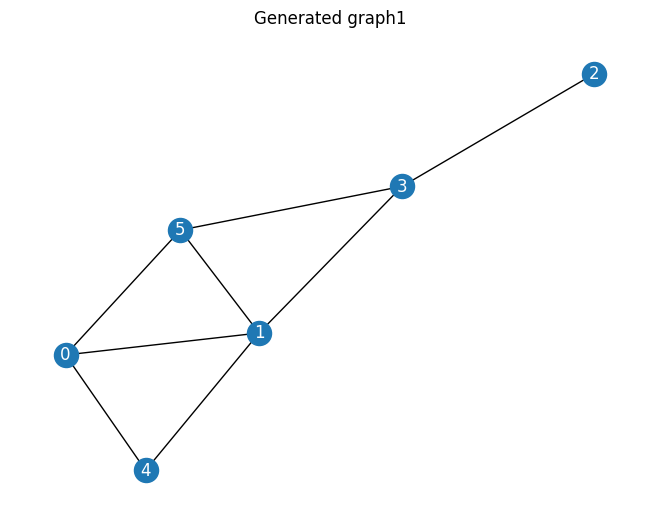

{0: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [21, 24], 'nodes_coord': [[11.43466, 3.420715, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 5, 8, 11, 0, 3, 5, 16, 20]}}


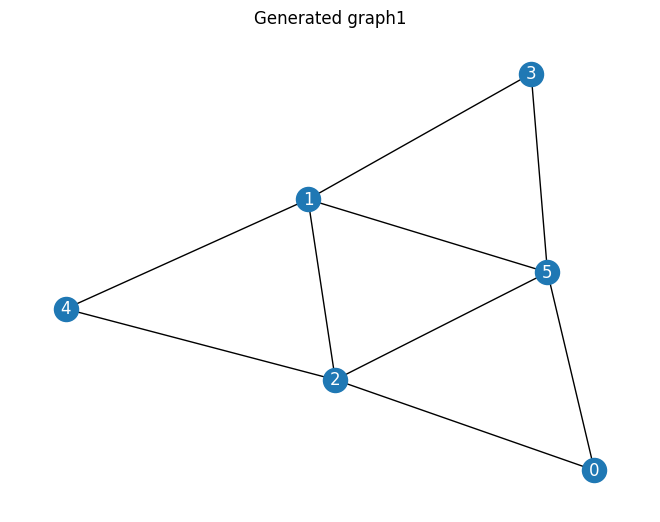

{0: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 1: {'nodes_combined': [5, 16], 'nodes_coord': [[11.434655, 5.832027, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [7, 13, 18, 8, 21, 15, 24, 9, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [21, 24], 'nodes_coord': [[11.43466, 3.420715, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [3, 5, 8, 11, 0, 3, 5, 16, 20]}}


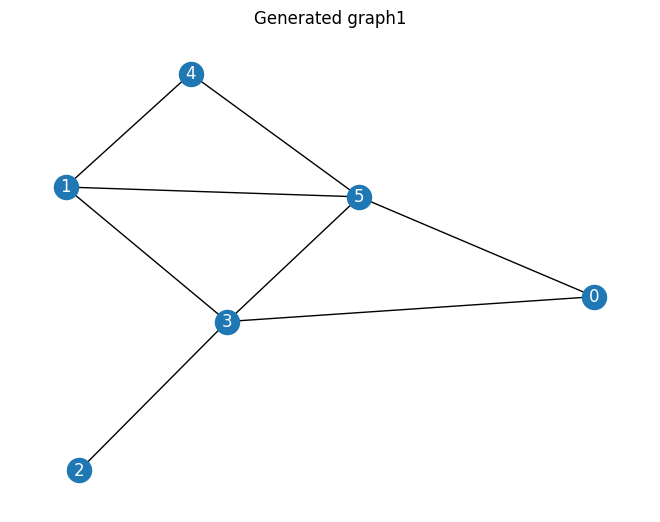

{0: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


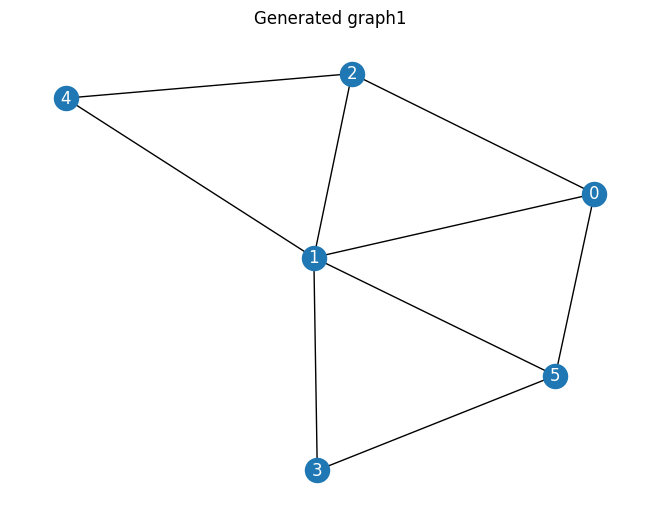

{0: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [6, 8], 'nodes_coord': [[2.633594, 1.965, 10.0], [7.081439, 1.965, 10.0]], 'adjacent_nodes': [22, 5, 21, 15, 11]}, 3: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 4: {'nodes_combined': [15, 22], 'nodes_coord': [[7.081439, 4.900683, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [5, 8, 6]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


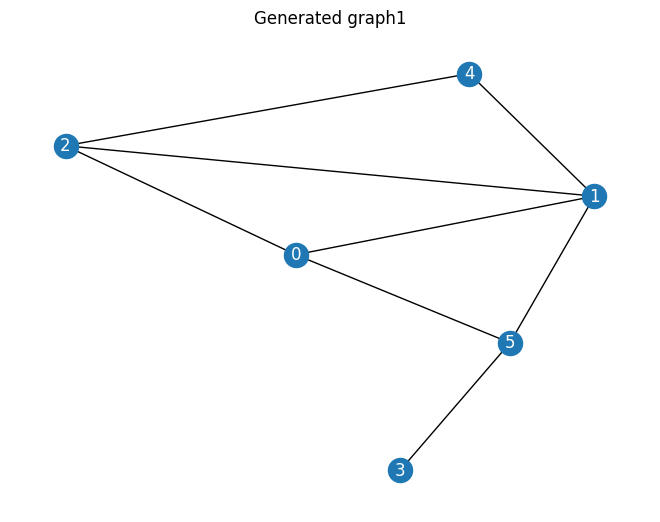

{0: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


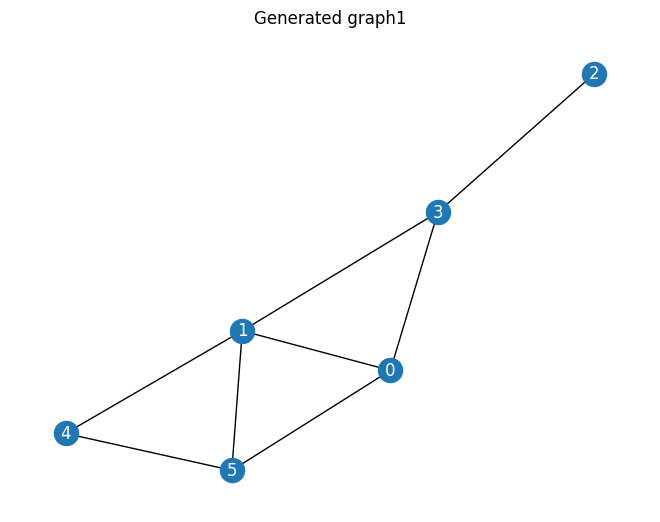

{0: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 1: {'nodes_combined': [5, 21], 'nodes_coord': [[11.434655, 5.832027, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 15, 24, 3, 8, 11, 24]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 15], 'nodes_coord': [[7.081439, 1.965, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [5, 6, 21, 11, 5, 22]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


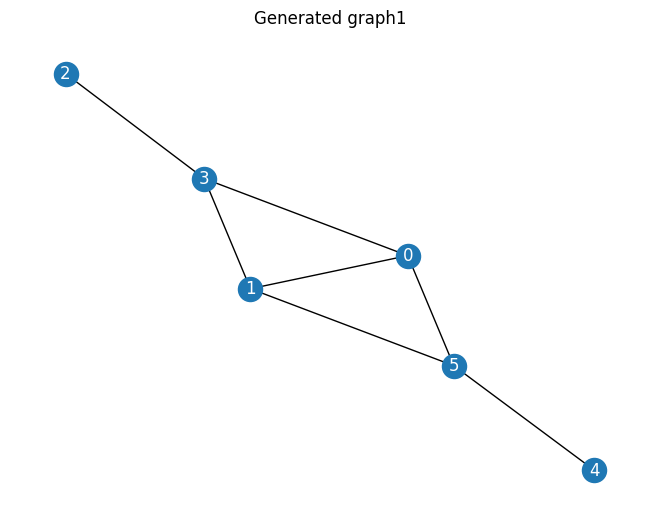

{0: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 21], 'nodes_coord': [[7.081439, 1.965, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [5, 6, 15, 11, 3, 5, 11, 24]}, 4: {'nodes_combined': [9, 16], 'nodes_coord': [[17.634283, 4.900683, 10.0], [14.881099, 4.900683, 10.0]], 'adjacent_nodes': [20, 5, 24]}, 5: {'nodes_combined': [20, 24], 'nodes_coord': [[17.634283, 1.965, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [9, 0, 3, 5, 16, 21]}}


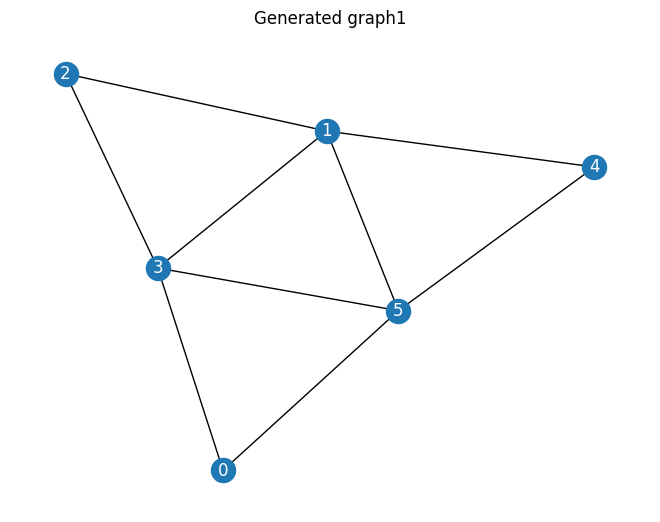

{0: {'nodes_combined': [3, 11], 'nodes_coord': [[12.452433, 1.987838, 10.0], [9.925599, 1.487905, 10.0]], 'adjacent_nodes': [0, 21, 24, 0, 8, 21]}, 1: {'nodes_combined': [5, 15], 'nodes_coord': [[11.434655, 5.832027, 10.0], [7.081439, 4.900683, 10.0]], 'adjacent_nodes': [7, 16, 13, 18, 8, 21, 24, 8, 22]}, 2: {'nodes_combined': [6, 22], 'nodes_coord': [[2.633594, 1.965, 10.0], [2.633595, 4.900683, 10.0]], 'adjacent_nodes': [8, 15]}, 3: {'nodes_combined': [8, 21], 'nodes_coord': [[7.081439, 1.965, 10.0], [11.43466, 3.420715, 10.0]], 'adjacent_nodes': [5, 6, 15, 11, 3, 5, 11, 24]}, 4: {'nodes_combined': [9, 20], 'nodes_coord': [[17.634283, 4.900683, 10.0], [17.634283, 1.965, 10.0]], 'adjacent_nodes': [16, 24]}, 5: {'nodes_combined': [16, 24], 'nodes_coord': [[14.881099, 4.900683, 10.0], [14.871856, 1.960205, 10.0]], 'adjacent_nodes': [5, 9, 0, 3, 5, 20, 21]}}


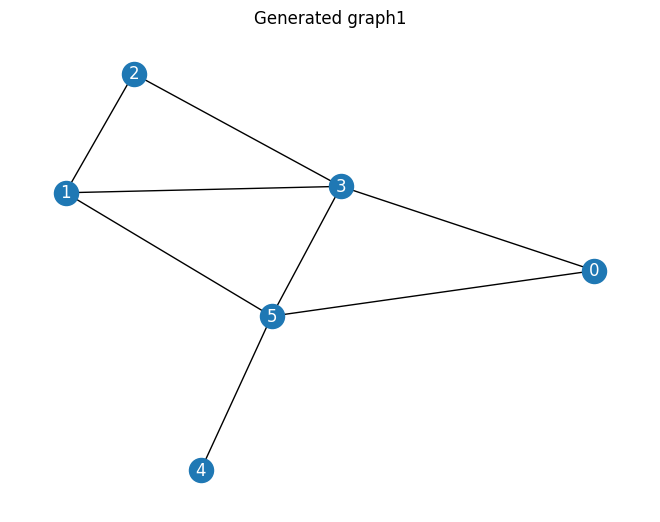

In [ ]:
for i,graph in enumerate(new_graphs_nodes_edges_graphs):
    new_graphs_lists = []

    for graph, data in new_graphs_nodes_edges_graphs[i].items():
        
        # Extract data
        nodes = data["Nodes"]
        edges = data["Edges"]
        
        # Initiate a new empty graph
        new_graph = nx.Graph()
        
        # Add new nodes
        new_graph.add_nodes_from(nodes)
        print(nodes)

        # Add new edges
        new_graph.add_edges_from(edges)
        
        # Save graph
        new_graphs_lists.append(new_graph)
        
        # Clear the output of the current cell
        clear_output(wait=True)

        # Draw/Visualize the new graph
        nx.draw(new_graph, with_labels = True, font_color = "White")

        # Add a title to the plot
        plt.title(f"Generated graph{i}", color="Black")  # Set the title with white text

        # Pause
        plt.pause(0.2)     

        # Show the plot
        plt.show()

### Export to JSON

In [ ]:
df_generated_graph = pd.DataFrame(new_graphs_nodes_edges_graphs).transpose()

In [ ]:
path = "/Users/georgiosgrigoriadis/Library/CloudStorage/GoogleDrive-georgios.grigoriadis@students.iaac.net/Το Drive μου/Thesis/Thesis_Polykatoikia/Case Study Polykatoikia/Data"
df_generated_graph.to_json(path_or_buf= path + "/permutation3")